# Experiment 2

Variable Absolute Max Bytes

This for Varied transaction rates. Batch Time out 2s.
Experiment 1.1 One Trasaction per 5 second 

In [11]:
from time import sleep
def create_peer_invoke_command():
    base = "docker exec -it cli peer chaincode invoke -o orderer.organ.com:7050 --tls true --cafile /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/ordererOrganizations/organ.com/orderers/orderer.organ.com/msp/tlscacerts/tlsca.organ.com-cert.pem -C organ-channel -n organcc "
    return(base)

def add_peers(org='hl', peer_n=0):
    hl_p1_add = ' --peerAddresses peer1.histocompatibility.organ.com:7051 '
    hl_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/histocompatibility.organ.com/peers/peer1.histocompatibility.organ.com/tls/ca.crt '
    hl_p0_add = ' --peerAddresses peer0.histocompatibility.organ.com:7051 '
    hl_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/histocompatibility.organ.com/peers/peer0.histocompatibility.organ.com/tls/ca.crt '
    
    ho_p1_add = ' --peerAddresses peer1.hospital.organ.com:7051 '
    ho_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hospital.organ.com/peers/peer1.hospital.organ.com/tls/ca.crt  '
    ho_p0_add = ' --peerAddresses peer0.hospital.organ.com:7051 '
    ho_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hospital.organ.com/peers/peer0.hospital.organ.com/tls/ca.crt  '
    
    gp_p1_add = ' --peerAddresses peer1.gp.organ.com:7051 '
    gp_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/gp.organ.com/peers/peer1.gp.organ.com/tls/ca.crt  '
    gp_p0_add = ' --peerAddresses peer0.gp.organ.com:7051 '
    gp_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/gp.organ.com/peers/peer0.gp.organ.com/tls/ca.crt  '
    
    op_p1_add = ' --peerAddresses peer1.opo.organ.com:7051 '
    op_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/opo.organ.com/peers/peer1.opo.organ.com/tls/ca.crt  '
    op_p0_add = ' --peerAddresses peer0.opo.organ.com:7051 '
    op_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/opo.organ.com/peers/peer0.opo.organ.com/tls/ca.crt  '
    cmd = ""
    cmd += create_peer_invoke_command() + hl_p1_add + hl_p1_cert
    cmd += hl_p0_add + hl_p0_cert
    cmd += ho_p0_add + ho_p0_cert + ho_p1_add + ho_p1_cert
    cmd += gp_p0_add + gp_p0_cert + gp_p1_add + gp_p1_cert
    cmd += op_p0_add + op_p0_cert + op_p1_add + op_p1_cert
    return(cmd)

def add_organ(organ_id = '', organ_name='', organ_data=''):
    cmd = add_peers() + '-c '
    
    cmd += '\'{"Args":["initOrgan", "' + str(organ_id) + '", "' + str(organ_name) + '", ' + str(organ_data) + ']}\''
    return(cmd)

def read_organ(organ_id='421'):
    cmd = add_peers()
    cmd +=  '-c \'{\"Args\":[\"readOrgan",\"' + str(organ_id) + '\"]}\''
    return(cmd)

def add_candidate(candidate_id = '', organ_name='', info=''):
    cmd = add_peers() + '-c '
    cmd += '\'{"Args":["initCandidate", "' + candidate_id + '", "' + organ_name + '", ' + info + ']}\''
    return(cmd)

def read_candidate(candidate_id='421'):
    cmd = add_peers()
    cmd +=  '-c \'{\"Args\":[\"readCandidate",\"' + str(candidate_id) + '\"]}\''
    return(cmd)

def docker_cleanup():
    !{ "docker rm -f $(docker ps -aq)"}
    !{ "docker volume prune -f"}
    !{ "docker network prune -f"}
    docker_images = "docker images --format '{{.Repository}}'"
    images = !{docker_images}
    dev_images=[]
    for image in images:
        if(image.find('dev-', 0, 6)>=0):
            dev_images.append(image)
    docker_rmi = "docker rmi -f "+" ".join(dev_images)
    print(docker_rmi)
    !{docker_rmi}

In [18]:
docker_cleanup()

"docker rm" requires at least 1 argument.
See 'docker rm --help'.

Usage:  docker rm [OPTIONS] CONTAINER [CONTAINER...]

Remove one or more containers
Total reclaimed space: 0B
docker rmi -f 
"docker rmi" requires at least 1 argument.
See 'docker rmi --help'.

Usage:  docker rmi [OPTIONS] IMAGE [IMAGE...]

Remove one or more images


In [19]:
with open(r"/home/thesis/Downloads/data_1.json", 'r') as file:
    data_1 = file.read()
with open(r"/home/thesis/Downloads/data_2.json", 'r') as file:
    data_2 = file.read()
with open(r"/home/thesis/Downloads/data_3.json", 'r') as file:
    data_3 = file.read()
with open(r"/home/thesis/Downloads/data_4.json", 'r') as file:
    data_4 = file.read()
import json
data = []
data.append(json.dumps(data_1))
data.append(json.dumps(data_2))
data.append(json.dumps(data_3))
data.append(json.dumps(data_4))

Issueing Transactions every 2 seconds

In [22]:
for i in range(15):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(5)

2019-04-24 01:50:11.415 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:50:11.415 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:50:11.415 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:50:11.415 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:50:11.415 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:50:11.415 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:50:11.416 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:50:11.416 UTC [viperutil] getKeysRec

2019-04-24 01:50:11.465 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc00032bbf0, READY
2019-04-24 01:50:11.466 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-24 01:50:11.466 UTC [grpc] DialContext -> DEBU 06e scheme "" not registered, fallback to default scheme
2019-04-24 01:50:11.466 UTC [grpc] watcher -> DEBU 06f ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:50:11.466 UTC [grpc] switchBalancer -> DEBU 070 ClientConn switching balancer to "pick_first"
2019-04-24 01:50:11.466 UTC [grpc] HandleSubConnStateChange -> DEBU 071 pickfirstBalancer: HandleSubConnStateChange: 0xc000381e70, CONNECTING
2019-04-24 01:50:11.469 UTC [grpc] HandleSubConnStateChange -> DEBU 072 pickfirstBalancer: HandleSubConnStateChange: 0xc000381e70, READY
2019-04-24 01:50:11.470 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-24 01:50:11.470 UTC [grpc] DialContext -> DEBU 074 scheme "" n

2019-04-24 01:50:14.036 UTC [grpc] DialContext -> DEBU 04f parsed scheme: ""
2019-04-24 01:50:14.036 UTC [grpc] DialContext -> DEBU 050 scheme "" not registered, fallback to default scheme
2019-04-24 01:50:14.036 UTC [grpc] watcher -> DEBU 051 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-24 01:50:14.036 UTC [grpc] switchBalancer -> DEBU 052 ClientConn switching balancer to "pick_first"
2019-04-24 01:50:14.036 UTC [grpc] HandleSubConnStateChange -> DEBU 053 pickfirstBalancer: HandleSubConnStateChange: 0xc000248bc0, CONNECTING
2019-04-24 01:50:14.053 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc000248bc0, READY
2019-04-24 01:50:14.054 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-24 01:50:14.054 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-24 01:50:14.054 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new add

2019-04-24 01:53:06.173 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD1070A6D08031A0B08D681FFE50510...9831BD616C2E1859B429E864F94D8C9B 
2019-04-24 01:53:06.173 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 842AA7C08D1B5D9FBC5858EC23E44306D947F1BB4CAE2FDB030545886E3C4B27 
2019-04-24 01:53:06.176 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" > payload:"\n q\342r\332\351R\014\242\213\374\2618\237\323\344t\244\202\264\010\314\372\214W\014o\263\317\ra\224y\022\202\206\001\n\333\205\001\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\276\205\001\n\007organcc\022\261\205\001\n\006\n\0048001\022\005\n\001\001\030\001\032\236\205\001\n\0048001\032\224\205\001{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmg

2019-04-24 01:53:08.632 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:08.632 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:08.632 UTC [viperutil] getKeysRecursively -> DEBU 003 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:53:08.632 UTC [viperutil] unmarshalJSON -> DEBU 004 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-24 01:53:08.632 UTC [viperutil] getKeysRecursively -> DEBU 005 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-24 01:53:08.632 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:08.632 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:53:08.632 UTC [vi

2019-04-24 01:53:08.677 UTC [grpc] switchBalancer -> DEBU 07c ClientConn switching balancer to "pick_first"
2019-04-24 01:53:08.677 UTC [grpc] HandleSubConnStateChange -> DEBU 07d pickfirstBalancer: HandleSubConnStateChange: 0xc00043e970, CONNECTING
2019-04-24 01:53:08.683 UTC [grpc] HandleSubConnStateChange -> DEBU 07e pickfirstBalancer: HandleSubConnStateChange: 0xc00043e970, READY
2019-04-24 01:53:08.692 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-24 01:53:08.692 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:08.692 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:53:08.692 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:08.692 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc0002ff0d0, CONNECTING
2019-04-24 01:53:08.707 UTC [grpc

2019-04-24 01:53:09.095 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" > payload:"\n 6\266\020\320#(\356=\314'\"\275\253\0179\345@\301\320=Q\264\243P\204\365\306.\211!\210\022\022\211\206\001\n\342\205\001\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\305\205\001\n\007organcc\022\270\205\001\n\006\n\0048002\022\023\n\001\001\030\001\"\014\n\n\n\0048001\022\002\010\006\032\227\205\001\n\0048002\032\215\205\001{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 9314697

2019-04-24 01:53:11.517 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:11.517 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:11.517 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:11.517 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:53:11.518 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-24 01:53:11.518 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:53:11.518 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:53:11.518 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-24 01:53:11.563 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-24 01:53:11.563 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:11.563 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:53:11.563 UTC [grpc] switchBalancer -> DEBU 06a ClientConn switching balancer to "pick_first"
2019-04-24 01:53:11.564 UTC [grpc] HandleSubConnStateChange -> DEBU 06b pickfirstBalancer: HandleSubConnStateChange: 0xc000276470, CONNECTING
2019-04-24 01:53:11.570 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc000276470, READY
2019-04-24 01:53:11.571 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-24 01:53:11.571 UTC [grpc] DialContext -> DEBU 06e scheme "" not registered, fallback to default scheme
2019-04-24 01:53:11.571 UTC [grpc] watcher -> DEBU 06f ccResolverWrapper: sending new addresses

2019-04-24 01:53:14.280 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:14.280 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:14.280 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:53:14.281 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:14.281 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:14.281 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:53:14.281 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:53:14.281 UTC [viperutil] getKeysRec

2019-04-24 01:53:14.298 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc000314c90, READY
2019-04-24 01:53:14.300 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:53:14.300 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:53:14.300 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:53:14.300 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:14.301 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc000206d20, CONNECTING
2019-04-24 01:53:14.308 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc000206d20, READY
2019-04-24 01:53:14.309 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:53:14.309 UTC [grpc] DialContext -> DEBU

2019-04-24 01:53:14.354 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-24 01:53:14.354 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:14.354 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:53:14.355 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:14.355 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc0001568a0, CONNECTING
2019-04-24 01:53:14.360 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc0001568a0, READY
2019-04-24 01:53:14.362 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:53:14.362 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:14.362 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresse

2019-04-24 01:53:17.087 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:17.088 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:17.088 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:53:17.088 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:17.088 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:17.088 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:53:17.088 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:53:17.088 UTC [viperutil] getKeysRec

2019-04-24 01:53:17.136 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc00061cc20, READY
2019-04-24 01:53:17.137 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:53:17.137 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:17.137 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:53:17.137 UTC [grpc] switchBalancer -> DEBU 088 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:17.137 UTC [grpc] HandleSubConnStateChange -> DEBU 089 pickfirstBalancer: HandleSubConnStateChange: 0xc0006d63f0, CONNECTING
2019-04-24 01:53:17.143 UTC [grpc] HandleSubConnStateChange -> DEBU 08a pickfirstBalancer: HandleSubConnStateChange: 0xc0006d63f0, READY
2019-04-24 01:53:17.144 UTC [grpc] DialContext -> DEBU 08b parsed scheme: ""
2019-04-24 01:53:17.144 UTC [grpc] DialContext -> DEBU 08c scheme "" 

2019-04-24 01:53:19.856 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:19.856 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:19.856 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:53:19.856 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:19.856 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:53:19.856 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-24 01:53:19.856 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-24 01:53:19.857 UTC [vipe

2019-04-24 01:53:19.908 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-24 01:53:19.908 UTC [grpc] DialContext -> DEBU 074 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:19.908 UTC [grpc] watcher -> DEBU 075 ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:53:19.908 UTC [grpc] switchBalancer -> DEBU 076 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:19.908 UTC [grpc] HandleSubConnStateChange -> DEBU 077 pickfirstBalancer: HandleSubConnStateChange: 0xc000399fe0, CONNECTING
2019-04-24 01:53:19.911 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc000399fe0, READY
2019-04-24 01:53:19.912 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-24 01:53:19.912 UTC [grpc] DialContext -> DEBU 07a scheme "" not registered, fallback to default scheme
2019-04-24 01:53:19.912 UTC [grpc] watcher -> DEBU 07b ccResolverWrapper: sending new addresses

2019-04-24 01:53:22.669 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:22.669 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:22.669 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:53:22.670 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:22.670 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:22.670 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:53:22.670 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:53:22.670 UTC [viperutil] getKeysRec

2019-04-24 01:53:22.687 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc00036cf80, READY
2019-04-24 01:53:22.688 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:53:22.688 UTC [grpc] DialContext -> DEBU 044 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:22.688 UTC [grpc] watcher -> DEBU 045 ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:53:22.688 UTC [grpc] switchBalancer -> DEBU 046 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:22.688 UTC [grpc] HandleSubConnStateChange -> DEBU 047 pickfirstBalancer: HandleSubConnStateChange: 0xc00031c150, CONNECTING
2019-04-24 01:53:22.691 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc00031c150, READY
2019-04-24 01:53:22.692 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-24 01:53:22.692 UTC [grpc] DialContext -> DEBU

2019-04-24 01:53:22.750 UTC [grpc] DialContext -> DEBU 08b parsed scheme: ""
2019-04-24 01:53:22.750 UTC [grpc] DialContext -> DEBU 08c scheme "" not registered, fallback to default scheme
2019-04-24 01:53:22.750 UTC [grpc] watcher -> DEBU 08d ccResolverWrapper: sending new addresses to cc: [{peer1.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:53:22.750 UTC [grpc] switchBalancer -> DEBU 08e ClientConn switching balancer to "pick_first"
2019-04-24 01:53:22.751 UTC [grpc] HandleSubConnStateChange -> DEBU 08f pickfirstBalancer: HandleSubConnStateChange: 0xc0001495c0, CONNECTING
2019-04-24 01:53:22.755 UTC [grpc] HandleSubConnStateChange -> DEBU 090 pickfirstBalancer: HandleSubConnStateChange: 0xc0001495c0, READY
2019-04-24 01:53:22.756 UTC [grpc] DialContext -> DEBU 091 parsed scheme: ""
2019-04-24 01:53:22.756 UTC [grpc] DialContext -> DEBU 092 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:22.756 UTC [grpc] watcher -> DEBU 093 ccResolverWrapper: sending new addresse

2019-04-24 01:53:25.391 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:25.392 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:25.392 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:53:25.392 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:25.392 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-24 01:53:25.392 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:53:25.392 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:53:25.392 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-24 01:53:25.438 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc000547e50, READY
2019-04-24 01:53:25.446 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-24 01:53:25.446 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:25.446 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:53:25.446 UTC [grpc] switchBalancer -> DEBU 06a ClientConn switching balancer to "pick_first"
2019-04-24 01:53:25.446 UTC [grpc] HandleSubConnStateChange -> DEBU 06b pickfirstBalancer: HandleSubConnStateChange: 0xc0002b9100, CONNECTING
2019-04-24 01:53:25.448 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc0002b9100, READY
2019-04-24 01:53:25.450 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-24 01:53:25.450 UTC [grpc] DialContext -> DEBU 06e scheme "" n

2019-04-24 01:53:28.119 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:28.120 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:28.120 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:53:28.120 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:28.120 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:28.120 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:53:28.121 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:53:28.121 UTC [viperutil] getKeysRec

2019-04-24 01:53:28.160 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc000283220, READY
2019-04-24 01:53:28.163 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-24 01:53:28.163 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:28.163 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-24 01:53:28.163 UTC [grpc] switchBalancer -> DEBU 058 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:28.163 UTC [grpc] HandleSubConnStateChange -> DEBU 059 pickfirstBalancer: HandleSubConnStateChange: 0xc0004c87b0, CONNECTING
2019-04-24 01:53:28.166 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc0004c87b0, READY
2019-04-24 01:53:28.167 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-24 01:53:28.167 UTC [grpc] DialContext -> DEBU 05c schem

2019-04-24 01:53:28.450 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD1070A6D08031A0B089883FFE50510...A5462BE88C35DF8941FB53CBFA8C7DC3 
2019-04-24 01:53:28.450 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: F7AABC0B768F2662760062BA9247DC9B6EB171D39C5DB533DD4537A3FEDC2349 
2019-04-24 01:53:28.452 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" > payload:"\n \226\021R \251\210L\270\222C9)B\250\276g\236V\377J\nAH\375\352\351Lx\376\261\3411\022\344\206\001\n\275\206\001\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\240\206\001\n\007organcc\022\223\206\001\n\006\n\0048009\022g\n\001\001\030\001\"`\n\n\n\0048001\022\002\010\006\n\n\n\0048002\022\002\010\007\n\n\n\0048003\022\002\010\010\n\n\n\0048004\022\002\010\t\n\n\n\0048005\022\002\010\n\n\n\n\0048006\022\002\010\013\n\n\n\0048007\022\002\010\014\n\n\n\0048008\022\002\010\r\032\236\205\001\n\0048009\0

2019-04-24 01:53:30.907 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:30.907 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:30.907 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:53:30.908 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:30.908 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-24 01:53:30.908 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:53:30.908 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:53:30.908 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-24 01:53:30.929 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:53:30.929 UTC [grpc] DialContext -> DEBU 044 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:30.929 UTC [grpc] watcher -> DEBU 045 ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:53:30.929 UTC [grpc] switchBalancer -> DEBU 046 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:30.929 UTC [grpc] HandleSubConnStateChange -> DEBU 047 pickfirstBalancer: HandleSubConnStateChange: 0xc0004ea410, CONNECTING
2019-04-24 01:53:30.934 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc0004ea410, READY
2019-04-24 01:53:30.935 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-24 01:53:30.935 UTC [grpc] DialContext -> DEBU 04a scheme "" not registered, fallback to default scheme
2019-04-24 01:53:30.935 UTC [grpc] watcher -> DEBU 04b ccResolverWrapper: sendi

2019-04-24 01:53:31.244 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD1070A6D08031A0B089B83FFE50510...37AA3E16C6D19F4CCE35E8A5737B5ED4 
2019-04-24 01:53:31.244 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: F79BEEA640581B91DB2E6F5DB6D807A0F852130CF722C463DB4B664708764768 
2019-04-24 01:53:31.248 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" > payload:"\n \265\244\340\203Pd\266\345\256\226\030J\332e3\233\210\355\3779Z:\356\246\222'<m\362\257(^\022\351\206\001\n\302\206\001\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\245\206\001\n\007organcc\022\230\206\001\n\006\n\0048010\022s\n\001\001\030\001\"l\n\n\n\0048001\022\002\010\006\n\n\n\0048002\022\002\010\007\n\n\n\0048003\022\002\010\010\n\n\n\0048004\022\002\010\t\n\n\n\0048005\022\002\010\n\n\n\n\0048006\022\002\010\013\n\n\n\0048007\022\002\010\014\n\n\n\0048008\022\002\010\r\n\n\n\0048009\022\0

2019-04-24 01:53:33.715 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:33.716 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-24 01:53:33.716 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:53:33.717 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Hash setting to <nil> <nil>
2019-04-24 01:53:33.717 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:53:33.717 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Security setting to <nil> <nil>
2019-04-24 01:53:33.718 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.PKCS11.FileKeyStore
2019-04-24 01:53:33.718 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value is not a string: <ni

2019-04-24 01:53:33.762 UTC [grpc] HandleSubConnStateChange -> DEBU 04e pickfirstBalancer: HandleSubConnStateChange: 0xc0002b3350, READY
2019-04-24 01:53:33.763 UTC [grpc] DialContext -> DEBU 04f parsed scheme: ""
2019-04-24 01:53:33.763 UTC [grpc] DialContext -> DEBU 050 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:33.763 UTC [grpc] watcher -> DEBU 051 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-24 01:53:33.763 UTC [grpc] switchBalancer -> DEBU 052 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:33.763 UTC [grpc] HandleSubConnStateChange -> DEBU 053 pickfirstBalancer: HandleSubConnStateChange: 0xc0002d42a0, CONNECTING
2019-04-24 01:53:33.766 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc0002d42a0, READY
2019-04-24 01:53:33.767 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-24 01:53:33.768 UTC [grpc] DialContext -> DEBU 056 schem

2019-04-24 01:53:34.055 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD2070A6E08031A0C089D83FFE50510...6C7BD72ADAF5108D211F0ED1D6344A24 
2019-04-24 01:53:34.055 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: E1A4D4683E34024798E2608B8D1E4BE7ABF66F568CF23002C1FA729EA5BB6C45 
2019-04-24 01:53:34.060 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" > payload:"\n \200\215\352\273\225\002AAm\232\035\357\224\017\215\304`\275EZ\240x\237\244\241\307\371[dY~\212\022\364\206\001\n\315\206\001\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\260\206\001\n\007organcc\022\243\206\001\n\006\n\0048011\022\177\n\001\001\030\001\"x\n\n\n\0048001\022\002\010\006\n\n\n\0048002\022\002\010\007\n\n\n\0048003\022\002\010\010\n\n\n\0048004\022\002\010\t\n\n\n\0048005\022\002\010\n\n\n\n\0048006\022\002\010\013\n\n\n\0048007\022\002\010\014\n\n\n\0048008\022\002\010\r\n\n\n\0048

2019-04-24 01:53:36.580 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:36.580 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-24 01:53:36.580 UTC [viperutil] getKeysRecursively -> DEBU 003 Found map[string]interface{} value for peer.BCCSP.PKCS11.FileKeyStore
2019-04-24 01:53:36.581 UTC [viperutil] unmarshalJSON -> DEBU 004 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:53:36.581 UTC [viperutil] getKeysRecursively -> DEBU 005 Found real value for peer.BCCSP.PKCS11.FileKeyStore.KeyStore setting to <nil> <nil>
2019-04-24 01:53:36.581 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:53:36.581 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.PKCS11.Library setting to <nil> <nil>
2019-04-24 01:53:36.582 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value is n

2019-04-24 01:53:36.618 UTC [grpc] DialContext -> DEBU 037 parsed scheme: ""
2019-04-24 01:53:36.618 UTC [grpc] DialContext -> DEBU 038 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:36.618 UTC [grpc] watcher -> DEBU 039 ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:53:36.618 UTC [grpc] switchBalancer -> DEBU 03a ClientConn switching balancer to "pick_first"
2019-04-24 01:53:36.618 UTC [grpc] HandleSubConnStateChange -> DEBU 03b pickfirstBalancer: HandleSubConnStateChange: 0xc000077720, CONNECTING
2019-04-24 01:53:36.625 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc000077720, READY
2019-04-24 01:53:36.626 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:53:36.626 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:53:36.626 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sendi

2019-04-24 01:53:36.979 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD2070A6E08031A0C08A083FFE50510...3E65BEF804122AAAA89A9633A24C327A 
2019-04-24 01:53:36.979 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 478AB81938443E9CD3FEC824EB46A20CE89ED034B66FD01428F32754D6060924 
2019-04-24 01:53:36.982 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" > payload:"\n \340kw\030\366\364\212\031\024\367\22590\0256H\205\367]\341\323ylo\243\250\232\215\224\033e\331\022\206\207\001\n\337\206\001\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\302\206\001\n\007organcc\022\265\206\001\n\006\n\0048012\022\214\001\n\001\001\030\001\"\204\001\n\n\n\0048001\022\002\010\006\n\n\n\0048002\022\002\010\007\n\n\n\0048003\022\002\010\010\n\n\n\0048004\022\002\010\t\n\n\n\0048005\022\002\010\n\n\n\n\0048006\022\002\010\013\n\n\n\0048007\022\002\010\014\n\n\n\0048008\022\002\010\r

2019-04-24 01:53:39.532 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:39.532 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:39.532 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:53:39.533 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:39.533 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:39.533 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:53:39.533 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:53:39.533 UTC [viperutil] getKeysRec

2019-04-24 01:53:39.549 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0001362b0, READY
2019-04-24 01:53:39.550 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:53:39.550 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:53:39.550 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:53:39.550 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:39.550 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc000241630, CONNECTING
2019-04-24 01:53:39.556 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc000241630, READY
2019-04-24 01:53:39.557 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:53:39.557 UTC [grpc] DialContext -> DEBU

2019-04-24 01:53:39.608 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc0004c8e60, READY
2019-04-24 01:53:39.610 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:53:39.610 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:39.611 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:53:39.612 UTC [grpc] switchBalancer -> DEBU 088 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:39.612 UTC [grpc] HandleSubConnStateChange -> DEBU 089 pickfirstBalancer: HandleSubConnStateChange: 0xc0006a3690, CONNECTING
2019-04-24 01:53:39.616 UTC [grpc] HandleSubConnStateChange -> DEBU 08a pickfirstBalancer: HandleSubConnStateChange: 0xc0006a3690, READY
2019-04-24 01:53:39.617 UTC [grpc] DialContext -> DEBU 08b parsed scheme: ""
2019-04-24 01:53:39.617 UTC [grpc] DialContext -> DEBU 08c scheme "" 

2019-04-24 01:53:42.385 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:42.385 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:42.385 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:53:42.385 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:42.386 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:42.386 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:53:42.386 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:53:42.386 UTC [viperutil] getKeysRec

2019-04-24 01:53:42.437 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-24 01:53:42.437 UTC [grpc] DialContext -> DEBU 074 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:42.438 UTC [grpc] watcher -> DEBU 075 ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:53:42.438 UTC [grpc] switchBalancer -> DEBU 076 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:42.438 UTC [grpc] HandleSubConnStateChange -> DEBU 077 pickfirstBalancer: HandleSubConnStateChange: 0xc0006066b0, CONNECTING
2019-04-24 01:53:42.442 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc0006066b0, READY
2019-04-24 01:53:42.443 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-24 01:53:42.443 UTC [grpc] DialContext -> DEBU 07a scheme "" not registered, fallback to default scheme
2019-04-24 01:53:42.443 UTC [grpc] watcher -> DEBU 07b ccResolverWrapper: sending new addresses

2019-04-24 01:53:45.219 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:45.220 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:45.220 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:53:45.220 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:45.220 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:45.220 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:53:45.220 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:53:45.220 UTC [viperutil] getKeysRec

2019-04-24 01:53:45.267 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-24 01:53:45.267 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:45.270 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-24 01:53:45.270 UTC [grpc] switchBalancer -> DEBU 064 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:45.271 UTC [grpc] HandleSubConnStateChange -> DEBU 065 pickfirstBalancer: HandleSubConnStateChange: 0xc0003161a0, CONNECTING
2019-04-24 01:53:45.275 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc0003161a0, READY
2019-04-24 01:53:45.277 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-24 01:53:45.277 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:45.277 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new add

2019-04-24 01:53:48.174 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:48.175 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-24 01:53:48.175 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:53:48.176 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Pin setting to <nil> <nil>
2019-04-24 01:53:48.177 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:53:48.177 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Hash setting to <nil> <nil>
2019-04-24 01:53:48.177 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:53:48.178 UTC [viperutil] getKeysRecursively -> DEBU 008 Found real value for peer.BCCSP.PKCS11.Security setting to <nil> <nil>
2

2019-04-24 01:53:48.204 UTC [grpc] DialContext -> DEBU 037 parsed scheme: ""
2019-04-24 01:53:48.204 UTC [grpc] DialContext -> DEBU 038 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:48.204 UTC [grpc] watcher -> DEBU 039 ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:53:48.204 UTC [grpc] switchBalancer -> DEBU 03a ClientConn switching balancer to "pick_first"
2019-04-24 01:53:48.204 UTC [grpc] HandleSubConnStateChange -> DEBU 03b pickfirstBalancer: HandleSubConnStateChange: 0xc000077b70, CONNECTING
2019-04-24 01:53:48.208 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc000077b70, READY
2019-04-24 01:53:48.209 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:53:48.209 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:53:48.210 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sendi

2019-04-24 01:53:48.654 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD2070A6E08031A0C08AC83FFE50510...D6E72EF594C03FCE5E6789A7A736AB42 
2019-04-24 01:53:48.654 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: F943D13F447174779550E22C6B9147B5411356B7CBCD7B9FF15C81AAE72742B3 
2019-04-24 01:53:48.657 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \003\337^\035\353P\350R\250\353\347{\314\021\351\273\212\216Lg\316\255\325\336k\033\304\214m\242\333m\022\321\214\002\n\255\214\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\220\214\002\n\007organcc\022\203\214\002\n\006\n\0044001\n\n\n\0048001\022\002\010\006\022\274\001\n\001\001\030\001\"\264\001\n\n\n\0044000\022\002\010\024\n\n\n\0048001\022\002\010\006\n\n\n\0048002\022\002\010\007\n\n\n\0048003\022\002\010\010\n\n\n\0048004\022\002\010\024\n\n\n\0048005\022\002\010\n\n\n\n\0048006\022\002\010\013\n\

2019-04-24 01:53:51.229 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:51.229 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:51.229 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: 256
2019-04-24 01:53:51.229 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:53:51.230 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:53:51.230 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-24 01:53:51.230 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-24 01:53:51.230 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value

2019-04-24 01:53:51.284 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc000077730, READY
2019-04-24 01:53:51.286 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-24 01:53:51.286 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:51.286 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:53:51.287 UTC [grpc] switchBalancer -> DEBU 06a ClientConn switching balancer to "pick_first"
2019-04-24 01:53:51.287 UTC [grpc] HandleSubConnStateChange -> DEBU 06b pickfirstBalancer: HandleSubConnStateChange: 0xc0003f9540, CONNECTING
2019-04-24 01:53:51.290 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc0003f9540, READY
2019-04-24 01:53:51.292 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-24 01:53:51.293 UTC [grpc] DialContext -> DEBU 06e scheme "" n

2019-04-24 01:53:54.357 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:54.358 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-24 01:53:54.358 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:53:54.358 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Pin setting to <nil> <nil>
2019-04-24 01:53:54.359 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:53:54.359 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Hash setting to <nil> <nil>
2019-04-24 01:53:54.360 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:53:54.360 UTC [viperutil] getKeysRecursively -> DEBU 008 Found real value for peer.BCCSP.PKCS11.Security setting to <nil> <nil>
2

2019-04-24 01:53:54.415 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc00058e1a0, READY
2019-04-24 01:53:54.416 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-24 01:53:54.416 UTC [grpc] DialContext -> DEBU 05c scheme "" not registered, fallback to default scheme
2019-04-24 01:53:54.416 UTC [grpc] watcher -> DEBU 05d ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-24 01:53:54.416 UTC [grpc] switchBalancer -> DEBU 05e ClientConn switching balancer to "pick_first"
2019-04-24 01:53:54.416 UTC [grpc] HandleSubConnStateChange -> DEBU 05f pickfirstBalancer: HandleSubConnStateChange: 0xc0002ae770, CONNECTING
2019-04-24 01:53:54.421 UTC [grpc] HandleSubConnStateChange -> DEBU 060 pickfirstBalancer: HandleSubConnStateChange: 0xc0002ae770, READY
2019-04-24 01:53:54.422 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-24 01:53:54.422 UTC [grpc] DialContext -> DEBU 062 schem

2019-04-24 01:53:54.779 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD2070A6E08031A0C08B283FFE50510...B0AF40F00726D1D7840D10C7AD4C0E0B 
2019-04-24 01:53:54.779 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: B1782B8A77DA0FCD962B0520E1A98E5B8A043DE897CB5B58AFF6577C5A26FF32 


2019-04-24 01:53:54.782 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \254\321\267\371\355\206\325\330\037\020\202\241\212\232^\270\033\373[7\363)\274x\037;.G\016\253T\345\022\331\214\002\n\265\214\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\230\214\002\n\007organcc\022\213\214\002\n\006\n\0044003\n\n\n\0048003\022\002\010\010\022\324\001\n\001\001\030\001\"\314\001\n\n\n\0044000\022\002\010\024\n\n\n\0044001\022\002\010\025\n\n\n\0044002\022\002\010\026\n\n\n\0048001\022\002\010\025\n\n\n\0048002\022\002\010\026\n\n\n\0048003\022\002\010\010\n\n\n\0048004\022\002\010\024\n\n\n\0048005\022\002\010\n\n\n\n\0048006\022\002\010\013\n\n\n\0048007\022\002\010\014\n\n\n\0048008\022\002\010\r\n\n\n\0048009\022\002\010\016\n\n\n\0048010\022\002\010\017\n\n\n\0048011\022\002\010\020\n\n\n\0048012\022\002\010\021\n\n\n\0048013\022\002\010\022\n\n\n\0048014\022\00

2019-04-24 01:53:57.397 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:53:57.398 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:53:57.398 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:53:57.398 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:53:57.398 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-24 01:53:57.398 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:53:57.399 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:53:57.399 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-24 01:53:57.436 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-24 01:53:57.437 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:57.437 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-24 01:53:57.437 UTC [grpc] switchBalancer -> DEBU 064 ClientConn switching balancer to "pick_first"
2019-04-24 01:53:57.437 UTC [grpc] HandleSubConnStateChange -> DEBU 065 pickfirstBalancer: HandleSubConnStateChange: 0xc000448a90, CONNECTING
2019-04-24 01:53:57.442 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc000448a90, READY
2019-04-24 01:53:57.444 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-24 01:53:57.444 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-24 01:53:57.444 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new add

2019-04-24 01:54:00.392 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:00.393 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:00.393 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:54:00.393 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:54:00.393 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:00.393 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:54:00.394 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:54:00.394 UTC [viperutil] getKeysRec

2019-04-24 01:54:00.402 UTC [msp.identity] newIdentity -> DEBU 030 Creating identity instance for cert -----BEGIN CERTIFICATE-----
MIICSzCCAfGgAwIBAgIQPS87ERNZVPj1vTA0cp/a4DAKBggqhkjOPQQDAjB3MQsw
CQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTEWMBQGA1UEBxMNU2FuIEZy
YW5jaXNjbzEbMBkGA1UEChMSaG9zcGl0YWwub3JnYW4uY29tMR4wHAYDVQQDExVj
YS5ob3NwaXRhbC5vcmdhbi5jb20wHhcNMTkwNDI0MDE0NDAwWhcNMjkwNDIxMDE0
NDAwWjB3MQswCQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTEWMBQGA1UE
BxMNU2FuIEZyYW5jaXNjbzEbMBkGA1UEChMSaG9zcGl0YWwub3JnYW4uY29tMR4w
HAYDVQQDExVjYS5ob3NwaXRhbC5vcmdhbi5jb20wWTATBgcqhkjOPQIBBggqhkjO
PQMBBwNCAARr5DcFdX4y63cQkAsezb8NgKG4PFWOhBFCb04KTSGAKU5mrYoj/xfs
gxuuIE+a9KiBU//v7kCWEfK5d+94KFS7o18wXTAOBgNVHQ8BAf8EBAMCAaYwDwYD
VR0lBAgwBgYEVR0lADAPBgNVHRMBAf8EBTADAQH/MCkGA1UdDgQiBCD3lpzTFVEu
FPlXW138N98BDOPl0lb5Z6UaQxptQK2D3TAKBggqhkjOPQQDAgNIADBFAiEAuU9N
9cKNmiSZ7eCYeYKt6zASQfPZgSmJYC7+cEFHzSUCIHAiwtY9uyKlcVdyTlZ9HTrF
1Qh8WqHcd5fcjcyltLAo
-----END CERTIFICATE-----
2019-04-24 01:54:00.402 UTC [msp.identity]

2019-04-24 01:54:00.462 UTC [grpc] HandleSubConnStateChange -> DEBU 072 pickfirstBalancer: HandleSubConnStateChange: 0xc0000af3e0, READY
2019-04-24 01:54:00.464 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-24 01:54:00.464 UTC [grpc] DialContext -> DEBU 074 scheme "" not registered, fallback to default scheme
2019-04-24 01:54:00.464 UTC [grpc] watcher -> DEBU 075 ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:54:00.464 UTC [grpc] switchBalancer -> DEBU 076 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:00.464 UTC [grpc] HandleSubConnStateChange -> DEBU 077 pickfirstBalancer: HandleSubConnStateChange: 0xc000440ae0, CONNECTING
2019-04-24 01:54:00.466 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc000440ae0, READY
2019-04-24 01:54:00.467 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-24 01:54:00.468 UTC [grpc] DialContext -> DEBU 07a scheme "" n

2019-04-24 01:54:05.578 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:05.583 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:54:05.584 UTC [viperutil] getKeysRecursively -> DEBU 003 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:54:05.584 UTC [viperutil] unmarshalJSON -> DEBU 004 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-24 01:54:05.585 UTC [viperutil] getKeysRecursively -> DEBU 005 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-24 01:54:05.585 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:05.585 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:54:05.586 UTC [vi

2019-04-24 01:54:05.644 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0004aa340, READY
2019-04-24 01:54:05.649 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:54:05.649 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:54:05.649 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:54:05.649 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:05.650 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc0000f1db0, CONNECTING
2019-04-24 01:54:05.677 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc0000f1db0, READY
2019-04-24 01:54:05.682 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:54:05.682 UTC [grpc] DialContext -> DEBU

2019-04-24 01:54:06.194 UTC [grpc] HandleSubConnStateChange -> DEBU 07e pickfirstBalancer: HandleSubConnStateChange: 0xc000403150, READY
2019-04-24 01:54:06.229 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-24 01:54:06.229 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-24 01:54:06.240 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:54:06.240 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:06.244 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc000417de0, CONNECTING
2019-04-24 01:54:06.308 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc000417de0, READY
2019-04-24 01:54:06.323 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:54:06.325 UTC [grpc] DialContext -> DEBU 086 scheme "" 

2019-04-24 01:54:08.719 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \242Q\363\314\025q\240\003\314\347U\005T\215\361\025\365\240\277\003\373q\273Ah\371\030y\177\344\2426\022\377\214\002\n\333\214\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\276\214\002\n\007organcc\022\261\214\002\n\006\n\0044006\n\n\n\0048006\022\002\010\013\022\370\001\n\001\001\030\001\"\360\001\n\n\n\0044000\022\002\010\024\n\n\n\0044001\022\002\010\025\n\n\n\0044002\022\002\010\026\n\n\n\0044003\022\002\010\027\n\n\n\0044004\022\002\010\030\n\n\n\0044005\022\002\010\031\n\n\n\0048001\022\002\010\025\n\n\n\0048002\022\002\010\026\n\n\n\0048003\022\002\010\027\n\n\n\0048004\022\002\010\024\n\n\n\0048005\022\002\010\031\n\n\n\0048006\022\002\010\013\n\n\n\0048007\022\002\010\014\n\n\n\0048008\022\002\010\030\n\n\n\0048009\022\002\010\016\n\n\n\0048010\022\002\010\017\n\n\n\0048011\02

2019-04-24 01:54:14.044 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:14.045 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-24 01:54:14.046 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:54:14.048 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Hash setting to <nil> <nil>
2019-04-24 01:54:14.049 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:54:14.051 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Security setting to <nil> <nil>
2019-04-24 01:54:14.053 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.PKCS11.FileKeyStore
2019-04-24 01:54:14.054 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value is not a string: <ni

2019-04-24 01:54:14.154 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc00025daf0, READY
2019-04-24 01:54:14.162 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:54:14.163 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:54:14.163 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:54:14.165 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:14.165 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc0001a8590, CONNECTING
2019-04-24 01:54:14.182 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc0001a8590, READY
2019-04-24 01:54:14.188 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:54:14.188 UTC [grpc] DialContext -> DEBU

2019-04-24 01:54:14.609 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-24 01:54:14.609 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-24 01:54:14.609 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:54:14.609 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:14.610 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc0005195a0, CONNECTING
2019-04-24 01:54:14.624 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc0005195a0, READY
2019-04-24 01:54:14.633 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:54:14.633 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-24 01:54:14.635 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresse

2019-04-24 01:54:17.219 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \336\310&\245.\274?\347E5\321/RH\373\234\034r\204\013\355\345\370l\rd\347\243z\255h9\022\211\215\002\n\345\214\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\310\214\002\n\007organcc\022\273\214\002\n\006\n\0044007\n\n\n\0048007\022\002\010\014\022\204\002\n\001\001\030\001\"\374\001\n\n\n\0044000\022\002\010\024\n\n\n\0044001\022\002\010\025\n\n\n\0044002\022\002\010\026\n\n\n\0044003\022\002\010\027\n\n\n\0044004\022\002\010\030\n\n\n\0044005\022\002\010\031\n\n\n\0044006\022\002\010\032\n\n\n\0048001\022\002\010\025\n\n\n\0048002\022\002\010\026\n\n\n\0048003\022\002\010\027\n\n\n\0048004\022\002\010\024\n\n\n\0048005\022\002\010\031\n\n\n\0048006\022\002\010\032\n\n\n\0048007\022\002\010\014\n\n\n\0048008\022\002\010\030\n\n\n\0048009\022\002\010\016\n\n\n\0048010\022\002\010\017\n\n

2019-04-24 01:54:22.435 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:22.436 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:22.437 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:54:22.440 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:54:22.443 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:22.443 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:54:22.445 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:54:22.445 UTC [viperutil] getKeysRec

2019-04-24 01:54:22.526 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0002b6b20, READY
2019-04-24 01:54:22.530 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:54:22.530 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:54:22.531 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:54:22.532 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:22.532 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc000076e00, CONNECTING
2019-04-24 01:54:22.544 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc000076e00, READY
2019-04-24 01:54:22.550 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:54:22.552 UTC [grpc] DialContext -> DEBU

2019-04-24 01:54:23.409 UTC [grpc] HandleSubConnStateChange -> DEBU 07e pickfirstBalancer: HandleSubConnStateChange: 0xc000579e00, READY
2019-04-24 01:54:23.464 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-24 01:54:23.468 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-24 01:54:23.468 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:54:23.478 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:23.490 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc0001e2ed0, CONNECTING
2019-04-24 01:54:23.566 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc0001e2ed0, READY
2019-04-24 01:54:23.610 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:54:23.610 UTC [grpc] DialContext -> DEBU 086 scheme "" 

2019-04-24 01:54:27.133 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \034\272i\251(\004\035\232\034\345H\303\201k\226\205P\274\"\373\013\034\321\270\3331r\270$\212*Y\022\301\215\002\n\235\215\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\200\215\002\n\007organcc\022\363\214\002\n\006\n\0044008\n\n\n\0048009\022\002\010\016\n\n\n\0048010\022\002\010\017\n\n\n\0048011\022\002\010\020\n\n\n\0048012\022\002\010\021\022\220\002\n\001\001\030\001\"\210\002\n\n\n\0044000\022\002\010\024\n\n\n\0044001\022\002\010\025\n\n\n\0044002\022\002\010\026\n\n\n\0044003\022\002\010\027\n\n\n\0044004\022\002\010\030\n\n\n\0044005\022\002\010\031\n\n\n\0044006\022\002\010\032\n\n\n\0044007\022\002\010\033\n\n\n\0048001\022\002\010\025\n\n\n\0048002\022\002\010\026\n\n\n\0048003\022\002\010\027\n\n\n\0048004\022\002\010\024\n\n\n\0048005\022\002\010\031\n\n\n\0048006\022\002

2019-04-24 01:54:30.319 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:30.319 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:30.319 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:54:30.319 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:54:30.319 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:30.319 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:54:30.320 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:54:30.320 UTC [viperutil] getKeysRec

2019-04-24 01:54:30.348 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc0002332a0, READY
2019-04-24 01:54:30.349 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-24 01:54:30.349 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-24 01:54:30.349 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-24 01:54:30.349 UTC [grpc] switchBalancer -> DEBU 058 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:30.349 UTC [grpc] HandleSubConnStateChange -> DEBU 059 pickfirstBalancer: HandleSubConnStateChange: 0xc00025ce70, CONNECTING
2019-04-24 01:54:30.352 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc00025ce70, READY
2019-04-24 01:54:30.352 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-24 01:54:30.352 UTC [grpc] DialContext -> DEBU 05c schem

2019-04-24 01:54:30.398 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc000332b90, READY
2019-04-24 01:54:30.401 UTC [msp.identity] Sign -> DEBU 09e Sign: plaintext: 0AD2070A6E08031A0C08D683FFE50510...5F4341445F444F4E223A20224346227D 
2019-04-24 01:54:30.401 UTC [msp.identity] Sign -> DEBU 09f Sign: digest: 6E6DFDD1FADB1CB61C51253762ACFE4D67CB0C60463242C5BF07CF1A1F091FCA 
2019-04-24 01:54:30.750 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD2070A6E08031A0C08D683FFE50510...557FFF90DC40E8C68EAAFA3453B1034B 
2019-04-24 01:54:30.750 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 23CDE7883C70F6F70D6FEF69D3CDBEA79AB9C1DC235CA4B46E0032A9DD6C3382 
2019-04-24 01:54:30.755 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \374%\233\005\267\032\245\301\235U\301\227i\364\177L\376\310Y\336\026J\210\276pQOA\253\320R\351\022\261\215\0

2019-04-24 01:54:33.340 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:33.341 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:33.341 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:54:33.341 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:54:33.341 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:33.341 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:54:33.341 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:54:33.341 UTC [viperutil] getKeysRec

2019-04-24 01:54:33.352 UTC [msp.identity] newIdentity -> DEBU 032 Creating identity instance for cert -----BEGIN CERTIFICATE-----
MIICMDCCAdegAwIBAgIRAP1cLrRpUldxeqz0DkRiqQowCgYIKoZIzj0EAwIwdzEL
MAkGA1UEBhMCVVMxEzARBgNVBAgTCkNhbGlmb3JuaWExFjAUBgNVBAcTDVNhbiBG
cmFuY2lzY28xGzAZBgNVBAoTEmhvc3BpdGFsLm9yZ2FuLmNvbTEeMBwGA1UEAxMV
Y2EuaG9zcGl0YWwub3JnYW4uY29tMB4XDTE5MDQyNDAxNDQwMFoXDTI5MDQyMTAx
NDQwMFowbjELMAkGA1UEBhMCVVMxEzARBgNVBAgTCkNhbGlmb3JuaWExFjAUBgNV
BAcTDVNhbiBGcmFuY2lzY28xDzANBgNVBAsTBmNsaWVudDEhMB8GA1UEAwwYQWRt
aW5AaG9zcGl0YWwub3JnYW4uY29tMFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAE
gljUsQtP6gVEn/TgzRtQV2/tNRja3pu+snb8xlEAPfdcDOdQx8v1xprCoff4btPZ
59hx3bFOvrJoda2h2IZCzqNNMEswDgYDVR0PAQH/BAQDAgeAMAwGA1UdEwEB/wQC
MAAwKwYDVR0jBCQwIoAg95ac0xVRLhT5V1td/DffAQzj5dJW+WelGkMabUCtg90w
CgYIKoZIzj0EAwIDRwAwRAIgJqAYqbRf04wc3pCmeEo/lP/W3HthUgn8IR+VAnA4
dSECIFEyZaH4UWONE/Rga4DjtkIGedWEfNFy/1tyuxwuB+0I
-----END CERTIFICATE-----
2019-04-24 01:54:33.354 UTC [bccsp_sw] loadPrivateKey -> DEBU 033 Loading priva

2019-04-24 01:54:33.476 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:54:33.476 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:33.476 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc000362fe0, CONNECTING
2019-04-24 01:54:33.487 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc000362fe0, READY
2019-04-24 01:54:33.489 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:54:33.489 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-24 01:54:33.489 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:54:33.489 UTC [grpc] switchBalancer -> DEBU 088 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:33.490 UTC [grpc]

2019-04-24 01:54:36.611 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:36.611 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:36.611 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:54:36.612 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:54:36.612 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:36.612 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:54:36.613 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:54:36.613 UTC [viperutil] getKeysRec

2019-04-24 01:54:36.638 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc000551c00, READY
2019-04-24 01:54:36.640 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-24 01:54:36.640 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-24 01:54:36.640 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-24 01:54:36.640 UTC [grpc] switchBalancer -> DEBU 058 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:36.640 UTC [grpc] HandleSubConnStateChange -> DEBU 059 pickfirstBalancer: HandleSubConnStateChange: 0xc000550ec0, CONNECTING
2019-04-24 01:54:36.646 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc000550ec0, READY
2019-04-24 01:54:36.647 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-24 01:54:36.647 UTC [grpc] DialContext -> DEBU 05c schem

2019-04-24 01:54:36.694 UTC [grpc] watcher -> DEBU 09a ccResolverWrapper: sending new addresses to cc: [{orderer.organ.com:7050 0  <nil>}]
2019-04-24 01:54:36.694 UTC [grpc] switchBalancer -> DEBU 09b ClientConn switching balancer to "pick_first"
2019-04-24 01:54:36.694 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc0006da1a0, CONNECTING
2019-04-24 01:54:36.698 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc0006da1a0, READY
2019-04-24 01:54:36.707 UTC [msp.identity] Sign -> DEBU 09e Sign: plaintext: 0AD2070A6E08031A0C08DC83FFE50510...5F4341445F444F4E223A20226153227D 
2019-04-24 01:54:36.708 UTC [msp.identity] Sign -> DEBU 09f Sign: digest: 6247773D0757BDA088886FB2BE1E521FA2C8EC3FED7BE50B7191F59C43FE4EDF 
2019-04-24 01:54:37.102 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD2070A6E08031A0C08DC83FFE50510...A60A3415911B681B6F4505D1845AB816 
2019-04-24 01:54:37.102 UTC [msp.identity]

2019-04-24 01:54:37.108 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n ?aV\2138\345\213I\001*y\021\204\025`\367\350\207\221\235\356\025\235\204\250qs,\272\021&\305\022\271\215\002\n\225\215\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\370\214\002\n\007organcc\022\353\214\002\n\006\n\0044011\n\n\n\0048011\022\002\010\020\022\264\002\n\001\001\030\001\"\254\002\n\n\n\0044000\022\002\010\024\n\n\n\0044001\022\002\010\025\n\n\n\0044002\022\002\010\026\n\n\n\0044003\022\002\010\027\n\n\n\0044004\022\002\010\030\n\n\n\0044005\022\002\010\031\n\n\n\0044006\022\002\010\032\n\n\n\0044007\022\002\010\033\n\n\n\0044008\022\002\010\034\n\n\n\0044009\022\002\010\035\n\n\n\0044010\022\002\010\036\n\n\n\0048001\022\002\010\025\n\n\n\0048002\022\002\010\026\n\n\n\0048003\022\002\010\027\n\n\n\0048004\022\002\010\024\n\n\n\0048005\022\002\010\031\n\n\n\0048006\022\002\010

2019-04-24 01:54:39.642 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:39.643 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:39.643 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:54:39.643 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:54:39.644 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:39.644 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:54:39.644 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:54:39.644 UTC [viperutil] getKeysRec

2019-04-24 01:54:39.652 UTC [msp] Setup -> DEBU 02f Setting up MSP instance HospitalMSP
2019-04-24 01:54:39.652 UTC [msp.identity] newIdentity -> DEBU 030 Creating identity instance for cert -----BEGIN CERTIFICATE-----
MIICSzCCAfGgAwIBAgIQPS87ERNZVPj1vTA0cp/a4DAKBggqhkjOPQQDAjB3MQsw
CQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTEWMBQGA1UEBxMNU2FuIEZy
YW5jaXNjbzEbMBkGA1UEChMSaG9zcGl0YWwub3JnYW4uY29tMR4wHAYDVQQDExVj
YS5ob3NwaXRhbC5vcmdhbi5jb20wHhcNMTkwNDI0MDE0NDAwWhcNMjkwNDIxMDE0
NDAwWjB3MQswCQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTEWMBQGA1UE
BxMNU2FuIEZyYW5jaXNjbzEbMBkGA1UEChMSaG9zcGl0YWwub3JnYW4uY29tMR4w
HAYDVQQDExVjYS5ob3NwaXRhbC5vcmdhbi5jb20wWTATBgcqhkjOPQIBBggqhkjO
PQMBBwNCAARr5DcFdX4y63cQkAsezb8NgKG4PFWOhBFCb04KTSGAKU5mrYoj/xfs
gxuuIE+a9KiBU//v7kCWEfK5d+94KFS7o18wXTAOBgNVHQ8BAf8EBAMCAaYwDwYD
VR0lBAgwBgYEVR0lADAPBgNVHRMBAf8EBTADAQH/MCkGA1UdDgQiBCD3lpzTFVEu
FPlXW138N98BDOPl0lb5Z6UaQxptQK2D3TAKBggqhkjOPQQDAgNIADBFAiEAuU9N
9cKNmiSZ7eCYeYKt6zASQfPZgSmJYC7+cEFHzSUCIHAiwtY9uyKlcVdyTlZ9HTrF
1

2019-04-24 01:54:39.708 UTC [grpc] HandleSubConnStateChange -> DEBU 06b pickfirstBalancer: HandleSubConnStateChange: 0xc0005e6310, CONNECTING
2019-04-24 01:54:39.735 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc0005e6310, READY
2019-04-24 01:54:39.768 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-24 01:54:39.768 UTC [grpc] DialContext -> DEBU 06e scheme "" not registered, fallback to default scheme
2019-04-24 01:54:39.768 UTC [grpc] watcher -> DEBU 06f ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:54:39.768 UTC [grpc] switchBalancer -> DEBU 070 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:39.768 UTC [grpc] HandleSubConnStateChange -> DEBU 071 pickfirstBalancer: HandleSubConnStateChange: 0xc000378480, CONNECTING
2019-04-24 01:54:39.780 UTC [grpc] HandleSubConnStateChange -> DEBU 072 pickfirstBalancer: HandleSubConnStateChange: 0xc000378480, READY
2019-

2019-04-24 01:54:42.776 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:42.776 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-24 01:54:42.777 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:54:42.778 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Security setting to <nil> <nil>
2019-04-24 01:54:42.778 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.PKCS11.FileKeyStore
2019-04-24 01:54:42.778 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:54:42.778 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.PKCS11.FileKeyStore.KeyStore setting to <nil> <nil>
2019-04-24 01:54:42.779 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value is 

2019-04-24 01:54:42.785 UTC [msp.identity] newIdentity -> DEBU 030 Creating identity instance for cert -----BEGIN CERTIFICATE-----
MIICSzCCAfGgAwIBAgIQPS87ERNZVPj1vTA0cp/a4DAKBggqhkjOPQQDAjB3MQsw
CQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTEWMBQGA1UEBxMNU2FuIEZy
YW5jaXNjbzEbMBkGA1UEChMSaG9zcGl0YWwub3JnYW4uY29tMR4wHAYDVQQDExVj
YS5ob3NwaXRhbC5vcmdhbi5jb20wHhcNMTkwNDI0MDE0NDAwWhcNMjkwNDIxMDE0
NDAwWjB3MQswCQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTEWMBQGA1UE
BxMNU2FuIEZyYW5jaXNjbzEbMBkGA1UEChMSaG9zcGl0YWwub3JnYW4uY29tMR4w
HAYDVQQDExVjYS5ob3NwaXRhbC5vcmdhbi5jb20wWTATBgcqhkjOPQIBBggqhkjO
PQMBBwNCAARr5DcFdX4y63cQkAsezb8NgKG4PFWOhBFCb04KTSGAKU5mrYoj/xfs
gxuuIE+a9KiBU//v7kCWEfK5d+94KFS7o18wXTAOBgNVHQ8BAf8EBAMCAaYwDwYD
VR0lBAgwBgYEVR0lADAPBgNVHRMBAf8EBTADAQH/MCkGA1UdDgQiBCD3lpzTFVEu
FPlXW138N98BDOPl0lb5Z6UaQxptQK2D3TAKBggqhkjOPQQDAgNIADBFAiEAuU9N
9cKNmiSZ7eCYeYKt6zASQfPZgSmJYC7+cEFHzSUCIHAiwtY9uyKlcVdyTlZ9HTrF
1Qh8WqHcd5fcjcyltLAo
-----END CERTIFICATE-----
2019-04-24 01:54:42.785 UTC [msp.identity]

2019-04-24 01:54:42.842 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc0002c2380, READY
2019-04-24 01:54:42.844 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-24 01:54:42.844 UTC [grpc] DialContext -> DEBU 07a scheme "" not registered, fallback to default scheme
2019-04-24 01:54:42.844 UTC [grpc] watcher -> DEBU 07b ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:54:42.845 UTC [grpc] switchBalancer -> DEBU 07c ClientConn switching balancer to "pick_first"
2019-04-24 01:54:42.845 UTC [grpc] HandleSubConnStateChange -> DEBU 07d pickfirstBalancer: HandleSubConnStateChange: 0xc0004387d0, CONNECTING
2019-04-24 01:54:42.848 UTC [grpc] HandleSubConnStateChange -> DEBU 07e pickfirstBalancer: HandleSubConnStateChange: 0xc0004387d0, READY
2019-04-24 01:54:42.849 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-24 01:54:42.849 UTC [grpc] DialContext -> DEBU 080 scheme "" n

2019-04-24 01:54:43.207 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \262Z\240Q\304\267\307\302\233\370C\357\227\263\233-\3257(\016\375)\203Pe\254C^\352\270\305\256\022\341\215\002\n\275\215\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\240\215\002\n\007organcc\022\223\215\002\n\006\n\0044013\n\n\n\0048013\022\002\010\022\022\314\002\n\001\001\030\001\"\304\002\n\n\n\0044000\022\002\010\024\n\n\n\0044001\022\002\010\025\n\n\n\0044002\022\002\010\026\n\n\n\0044003\022\002\010\027\n\n\n\0044004\022\002\010\030\n\n\n\0044005\022\002\010\031\n\n\n\0044006\022\002\010\032\n\n\n\0044007\022\002\010\033\n\n\n\0044008\022\002\010\034\n\n\n\0044009\022\002\010\035\n\n\n\0044010\022\002\010\036\n\n\n\0044011\022\002\010\037\n\n\n\0044012\022\002\010 \n\n\n\0048001\022\002\010\025\n\n\n\0048002\022\002\010\026\n\n\n\0048003\022\002\010\027\n\n\n\0048004\022\002\010

2019-04-24 01:54:45.682 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:45.683 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:45.683 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:54:45.683 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:54:45.683 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:54:45.683 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-24 01:54:45.683 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-24 01:54:45.684 UTC [vipe

2019-04-24 01:54:45.730 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-24 01:54:45.730 UTC [grpc] DialContext -> DEBU 06e scheme "" not registered, fallback to default scheme
2019-04-24 01:54:45.730 UTC [grpc] watcher -> DEBU 06f ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:54:45.731 UTC [grpc] switchBalancer -> DEBU 070 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:45.731 UTC [grpc] HandleSubConnStateChange -> DEBU 071 pickfirstBalancer: HandleSubConnStateChange: 0xc0000dee20, CONNECTING
2019-04-24 01:54:45.733 UTC [grpc] HandleSubConnStateChange -> DEBU 072 pickfirstBalancer: HandleSubConnStateChange: 0xc0000dee20, READY
2019-04-24 01:54:45.734 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-24 01:54:45.734 UTC [grpc] DialContext -> DEBU 074 scheme "" not registered, fallback to default scheme
2019-04-24 01:54:45.734 UTC [grpc] watcher -> DEBU 075 ccResolverWrapper: sending new addresses

2019-04-24 01:54:46.256 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \333P\353dN<k\025\"\362hz\203C\335\000\212\364M\210\3418B\311|\217\242l$py8\022\337\215\002\n\273\215\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\236\215\002\n\007organcc\022\221\215\002\n\006\n\0044014\n\n\n\0048014\022\002\010\023\022\330\002\n\001\001\030\001\"\320\002\n\n\n\0044000\022\002\010\024\n\n\n\0044001\022\002\010\025\n\n\n\0044002\022\002\010\026\n\n\n\0044003\022\002\010\027\n\n\n\0044004\022\002\010\030\n\n\n\0044005\022\002\010\031\n\n\n\0044006\022\002\010\032\n\n\n\0044007\022\002\010\033\n\n\n\0044008\022\002\010\034\n\n\n\0044009\022\002\010\035\n\n\n\0044010\022\002\010\036\n\n\n\0044011\022\002\010\037\n\n\n\0044012\022\002\010 \n\n\n\0044013\022\002\010!\n\n\n\0048001\022\002\010\025\n\n\n\0048002\022\002\010\026\n\n\n\0048003\022\002\010\027\n\n\n\0048004\022\

2019-04-24 01:54:48.835 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:48.835 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:54:48.836 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: 256
2019-04-24 01:54:48.836 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:54:48.836 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:54:48.836 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-24 01:54:48.836 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-24 01:54:48.837 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value

2019-04-24 01:54:48.887 UTC [grpc] HandleSubConnStateChange -> DEBU 072 pickfirstBalancer: HandleSubConnStateChange: 0xc0001f82d0, READY
2019-04-24 01:54:48.888 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-24 01:54:48.888 UTC [grpc] DialContext -> DEBU 074 scheme "" not registered, fallback to default scheme
2019-04-24 01:54:48.888 UTC [grpc] watcher -> DEBU 075 ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:54:48.888 UTC [grpc] switchBalancer -> DEBU 076 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:48.888 UTC [grpc] HandleSubConnStateChange -> DEBU 077 pickfirstBalancer: HandleSubConnStateChange: 0xc000357010, CONNECTING
2019-04-24 01:54:48.891 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc000357010, READY
2019-04-24 01:54:48.892 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-24 01:54:48.892 UTC [grpc] DialContext -> DEBU 07a scheme "" n

2019-04-24 01:54:51.526 UTC [grpc] HandleSubConnStateChange -> DEBU 04e pickfirstBalancer: HandleSubConnStateChange: 0xc00022ab80, READY
2019-04-24 01:54:51.527 UTC [grpc] DialContext -> DEBU 04f parsed scheme: ""
2019-04-24 01:54:51.527 UTC [grpc] DialContext -> DEBU 050 scheme "" not registered, fallback to default scheme
2019-04-24 01:54:51.527 UTC [grpc] watcher -> DEBU 051 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-24 01:54:51.527 UTC [grpc] switchBalancer -> DEBU 052 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:51.527 UTC [grpc] HandleSubConnStateChange -> DEBU 053 pickfirstBalancer: HandleSubConnStateChange: 0xc0003b5230, CONNECTING
2019-04-24 01:54:51.537 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc0003b5230, READY
2019-04-24 01:54:51.538 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-24 01:54:51.538 UTC [grpc] DialContext -> DEBU 056 schem

2019-04-24 01:54:51.698 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD2070A6E08031A0C08EB83FFE50510...57B8986796517FC8469A741AFF00C34A 
2019-04-24 01:54:51.698 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 8036C4199952FC3644B1006412659A01648369AC1AB204CC3094B0AE89980EAB 
2019-04-24 01:54:51.703 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hype

2019-04-24 01:54:54.145 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:54.145 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:54:54.146 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:54.146 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:54:54.146 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-24 01:54:54.146 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:54:54.147 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:54:54.147 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-24 01:54:54.166 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0005c92d0, READY
2019-04-24 01:54:54.173 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:54:54.173 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:54:54.173 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:54:54.173 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:54.173 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc0003cd8e0, CONNECTING
2019-04-24 01:54:54.176 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc0003cd8e0, READY
2019-04-24 01:54:54.176 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:54:54.177 UTC [grpc] DialContext -> DEBU

2019-04-24 01:54:54.346 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD1070A6D08031A0B08EE83FFE50510...9617F87E3680C385CF981E669C4BDD9C 
2019-04-24 01:54:54.346 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 68F2FD819DF6902D2C062D2786A94B852C20B9C7C0D965F45ECD2B7289EF905C 
2019-04-24 01:54:54.352 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hyp

2019-04-24 01:54:54.377 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-24 01:54:56.825 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:56.825 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-24 01:54:56.825 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:54:56.825 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Hash setting to <nil> <nil>
2019-04-24 01:54:56.825 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:54:56.826 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Security setting to <nil> <nil>
2019-04-24 01:54:56.826 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.PKCS11.FileKeyStore
2019-04-24 01:54:56.826 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value is not a string: <ni

2019-04-24 01:54:56.875 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc000130500, READY
2019-04-24 01:54:56.876 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:54:56.876 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-24 01:54:56.876 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:54:56.876 UTC [grpc] switchBalancer -> DEBU 088 ClientConn switching balancer to "pick_first"
2019-04-24 01:54:56.876 UTC [grpc] HandleSubConnStateChange -> DEBU 089 pickfirstBalancer: HandleSubConnStateChange: 0xc0001e58e0, CONNECTING
2019-04-24 01:54:56.880 UTC [grpc] HandleSubConnStateChange -> DEBU 08a pickfirstBalancer: HandleSubConnStateChange: 0xc0001e58e0, READY
2019-04-24 01:54:56.881 UTC [grpc] DialContext -> DEBU 08b parsed scheme: ""
2019-04-24 01:54:56.881 UTC [grpc] DialContext -> DEBU 08c scheme "" 

2019-04-24 01:54:59.478 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:54:59.478 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:54:59.478 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:54:59.479 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:54:59.479 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:54:59.479 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-24 01:54:59.479 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-24 01:54:59.479 UTC [vipe

2019-04-24 01:54:59.486 UTC [msp] newBccspMsp -> DEBU 02c Creating BCCSP-based MSP instance
2019-04-24 01:54:59.486 UTC [msp] New -> DEBU 02d Creating Cache-MSP instance
2019-04-24 01:54:59.486 UTC [msp] loadLocaMSP -> DEBU 02e Created new local MSP
2019-04-24 01:54:59.486 UTC [msp] Setup -> DEBU 02f Setting up MSP instance HospitalMSP
2019-04-24 01:54:59.486 UTC [msp.identity] newIdentity -> DEBU 030 Creating identity instance for cert -----BEGIN CERTIFICATE-----
MIICSzCCAfGgAwIBAgIQPS87ERNZVPj1vTA0cp/a4DAKBggqhkjOPQQDAjB3MQsw
CQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTEWMBQGA1UEBxMNU2FuIEZy
YW5jaXNjbzEbMBkGA1UEChMSaG9zcGl0YWwub3JnYW4uY29tMR4wHAYDVQQDExVj
YS5ob3NwaXRhbC5vcmdhbi5jb20wHhcNMTkwNDI0MDE0NDAwWhcNMjkwNDIxMDE0
NDAwWjB3MQswCQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTEWMBQGA1UE
BxMNU2FuIEZyYW5jaXNjbzEbMBkGA1UEChMSaG9zcGl0YWwub3JnYW4uY29tMR4w
HAYDVQQDExVjYS5ob3NwaXRhbC5vcmdhbi5jb20wWTATBgcqhkjOPQIBBggqhkjO
PQMBBwNCAARr5DcFdX4y63cQkAsezb8NgKG4PFWOhBFCb04KTSGAKU5mrYoj/xfs
gxuuIE+a9Ki

2019-04-24 01:54:59.544 UTC [grpc] HandleSubConnStateChange -> DEBU 08a pickfirstBalancer: HandleSubConnStateChange: 0xc0003ffd90, READY
2019-04-24 01:54:59.546 UTC [grpc] DialContext -> DEBU 08b parsed scheme: ""
2019-04-24 01:54:59.546 UTC [grpc] DialContext -> DEBU 08c scheme "" not registered, fallback to default scheme
2019-04-24 01:54:59.546 UTC [grpc] watcher -> DEBU 08d ccResolverWrapper: sending new addresses to cc: [{peer1.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:54:59.546 UTC [grpc] switchBalancer -> DEBU 08e ClientConn switching balancer to "pick_first"
2019-04-24 01:54:59.546 UTC [grpc] HandleSubConnStateChange -> DEBU 08f pickfirstBalancer: HandleSubConnStateChange: 0xc0001565d0, CONNECTING
2019-04-24 01:54:59.553 UTC [grpc] HandleSubConnStateChange -> DEBU 090 pickfirstBalancer: HandleSubConnStateChange: 0xc0001565d0, READY
2019-04-24 01:54:59.554 UTC [grpc] DialContext -> DEBU 091 parsed scheme: ""
2019-04-24 01:54:59.554 UTC [grpc] DialContext -> DEBU 092 scheme "" 

2019-04-24 01:54:59.642 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\

2019-04-24 01:55:02.159 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:02.160 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:02.160 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:02.160 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:02.160 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:02.160 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:55:02.161 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:02.161 UTC [viperutil] getKeysRec

2019-04-24 01:55:02.214 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc0000e2710, READY
2019-04-24 01:55:02.222 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-24 01:55:02.222 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:02.222 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:55:02.222 UTC [grpc] switchBalancer -> DEBU 06a ClientConn switching balancer to "pick_first"
2019-04-24 01:55:02.222 UTC [grpc] HandleSubConnStateChange -> DEBU 06b pickfirstBalancer: HandleSubConnStateChange: 0xc000389790, CONNECTING
2019-04-24 01:55:02.230 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc000389790, READY
2019-04-24 01:55:02.231 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-24 01:55:02.231 UTC [grpc] DialContext -> DEBU 06e scheme "" n

2019-04-24 01:55:04.854 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:04.854 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:04.854 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:04.854 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:04.856 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:04.856 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:55:04.856 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:55:04.856 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-24 01:55:04.892 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc0006fccf0, READY
2019-04-24 01:55:04.893 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-24 01:55:04.893 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:04.894 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:55:04.894 UTC [grpc] switchBalancer -> DEBU 06a ClientConn switching balancer to "pick_first"
2019-04-24 01:55:04.894 UTC [grpc] HandleSubConnStateChange -> DEBU 06b pickfirstBalancer: HandleSubConnStateChange: 0xc000786830, CONNECTING
2019-04-24 01:55:04.896 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc000786830, READY
2019-04-24 01:55:04.897 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-24 01:55:04.897 UTC [grpc] DialContext -> DEBU 06e scheme "" n

2019-04-24 01:55:07.488 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:07.488 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:07.489 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:07.489 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:55:07.489 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:07.489 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:55:07.489 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:55:07.489 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-24 01:55:07.523 UTC [grpc] HandleSubConnStateChange -> DEBU 05f pickfirstBalancer: HandleSubConnStateChange: 0xc0001d0850, CONNECTING
2019-04-24 01:55:07.532 UTC [grpc] HandleSubConnStateChange -> DEBU 060 pickfirstBalancer: HandleSubConnStateChange: 0xc0001d0850, READY
2019-04-24 01:55:07.533 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-24 01:55:07.533 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:07.533 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-24 01:55:07.533 UTC [grpc] switchBalancer -> DEBU 064 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:07.533 UTC [grpc] HandleSubConnStateChange -> DEBU 065 pickfirstBalancer: HandleSubConnStateChange: 0xc0000af070, CONNECTING
2019-04-24 01:55:07.535 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc0000af070, READY

2019-04-24 01:55:07.683 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD2070A6E08031A0C08FB83FFE50510...71B141D0185C73F2A65AA3E6BB63E023 
2019-04-24 01:55:07.683 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 8D862C691BED4FF8A8A7DFC4E48CE02522B7B2326566FB0B5914212A0068A7DF 
2019-04-24 01:55:07.721 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8007\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hyp

2019-04-24 01:55:10.184 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:10.184 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:10.184 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:10.185 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:10.185 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:10.185 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:55:10.186 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:10.186 UTC [viperutil] getKeysRec

2019-04-24 01:55:10.243 UTC [grpc] HandleSubConnStateChange -> DEBU 072 pickfirstBalancer: HandleSubConnStateChange: 0xc00023a6b0, READY
2019-04-24 01:55:10.244 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-24 01:55:10.244 UTC [grpc] DialContext -> DEBU 074 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:10.245 UTC [grpc] watcher -> DEBU 075 ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:55:10.245 UTC [grpc] switchBalancer -> DEBU 076 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:10.245 UTC [grpc] HandleSubConnStateChange -> DEBU 077 pickfirstBalancer: HandleSubConnStateChange: 0xc0003a68a0, CONNECTING
2019-04-24 01:55:10.249 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc0003a68a0, READY
2019-04-24 01:55:10.250 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-24 01:55:10.250 UTC [grpc] DialContext -> DEBU 07a scheme "" n

2019-04-24 01:55:12.845 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:12.846 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:12.846 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:12.846 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:12.846 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:12.846 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:55:12.846 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:55:12.846 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-24 01:55:12.871 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc0000139a0, READY
2019-04-24 01:55:12.872 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-24 01:55:12.872 UTC [grpc] DialContext -> DEBU 04a scheme "" not registered, fallback to default scheme
2019-04-24 01:55:12.872 UTC [grpc] watcher -> DEBU 04b ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:55:12.872 UTC [grpc] switchBalancer -> DEBU 04c ClientConn switching balancer to "pick_first"
2019-04-24 01:55:12.872 UTC [grpc] HandleSubConnStateChange -> DEBU 04d pickfirstBalancer: HandleSubConnStateChange: 0xc0005aacd0, CONNECTING
2019-04-24 01:55:12.875 UTC [grpc] HandleSubConnStateChange -> DEBU 04e pickfirstBalancer: HandleSubConnStateChange: 0xc0005aacd0, READY
2019-04-24 01:55:12.876 UTC [grpc] DialContext -> DEBU 04f parsed scheme: ""
2019-04-24 01:55:12.876 UTC [grpc] DialContext -> DEBU

2019-04-24 01:55:12.926 UTC [grpc] DialContext -> DEBU 08b parsed scheme: ""
2019-04-24 01:55:12.926 UTC [grpc] DialContext -> DEBU 08c scheme "" not registered, fallback to default scheme
2019-04-24 01:55:12.926 UTC [grpc] watcher -> DEBU 08d ccResolverWrapper: sending new addresses to cc: [{peer1.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:55:12.926 UTC [grpc] switchBalancer -> DEBU 08e ClientConn switching balancer to "pick_first"
2019-04-24 01:55:12.927 UTC [grpc] HandleSubConnStateChange -> DEBU 08f pickfirstBalancer: HandleSubConnStateChange: 0xc00065aed0, CONNECTING
2019-04-24 01:55:12.930 UTC [grpc] HandleSubConnStateChange -> DEBU 090 pickfirstBalancer: HandleSubConnStateChange: 0xc00065aed0, READY
2019-04-24 01:55:12.934 UTC [grpc] DialContext -> DEBU 091 parsed scheme: ""
2019-04-24 01:55:12.934 UTC [grpc] DialContext -> DEBU 092 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:12.934 UTC [grpc] watcher -> DEBU 093 ccResolverWrapper: sending new addresse

2019-04-24 01:55:13.043 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8009\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\

2019-04-24 01:55:15.525 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:15.525 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-24 01:55:15.526 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:55:15.526 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Security setting to <nil> <nil>
2019-04-24 01:55:15.526 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.PKCS11.FileKeyStore
2019-04-24 01:55:15.526 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:55:15.526 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.PKCS11.FileKeyStore.KeyStore setting to <nil> <nil>
2019-04-24 01:55:15.526 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value is 

2019-04-24 01:55:15.535 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc00028e320, READY
2019-04-24 01:55:15.536 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:55:15.536 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:55:15.536 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:55:15.536 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:15.536 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc0000779c0, CONNECTING
2019-04-24 01:55:15.538 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc0000779c0, READY
2019-04-24 01:55:15.538 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:55:15.538 UTC [grpc] DialContext -> DEBU

2019-04-24 01:55:15.588 UTC [msp.identity] Sign -> DEBU 09e Sign: plaintext: 0AD2070A6E08031A0C088384FFE50510...6443616E6469646174650A0438303130 
2019-04-24 01:55:15.588 UTC [msp.identity] Sign -> DEBU 09f Sign: digest: 726C6D2D3136BD3264D82C47F12C141846F081A6A4BEAF1619DF077949948C8A 
2019-04-24 01:55:15.664 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD2070A6E08031A0C088384FFE50510...5AB0E49153F7FE33551F910DE8C9CC90 
2019-04-24 01:55:15.664 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: A85DD19DC77CE5866676178AE0FF7629FEB07044608B427E2ED9A4AB523945BB 
2019-04-24 01:55:15.670 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8010\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_do

2019-04-24 01:55:15.701 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8010\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-24 01:55:18.190 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:18.190 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:18.190 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:18.190 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:18.191 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:55:18.191 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-24 01:55:18.191 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-24 01:55:18.191 UTC [vipe

2019-04-24 01:55:18.254 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-24 01:55:18.254 UTC [grpc] DialContext -> DEBU 074 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:18.254 UTC [grpc] watcher -> DEBU 075 ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:55:18.254 UTC [grpc] switchBalancer -> DEBU 076 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:18.255 UTC [grpc] HandleSubConnStateChange -> DEBU 077 pickfirstBalancer: HandleSubConnStateChange: 0xc0005209e0, CONNECTING
2019-04-24 01:55:18.258 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc0005209e0, READY
2019-04-24 01:55:18.259 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-24 01:55:18.259 UTC [grpc] DialContext -> DEBU 07a scheme "" not registered, fallback to default scheme
2019-04-24 01:55:18.259 UTC [grpc] watcher -> DEBU 07b ccResolverWrapper: sending new addresses

2019-04-24 01:55:18.398 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8011\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-24 01:55:20.857 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:20.857 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:20.858 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:20.858 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:20.858 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:55:20.858 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-24 01:55:20.858 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-24 01:55:20.858 UTC [vipe

2019-04-24 01:55:20.875 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:55:20.876 UTC [grpc] DialContext -> DEBU 044 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:20.876 UTC [grpc] watcher -> DEBU 045 ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:55:20.876 UTC [grpc] switchBalancer -> DEBU 046 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:20.876 UTC [grpc] HandleSubConnStateChange -> DEBU 047 pickfirstBalancer: HandleSubConnStateChange: 0xc00041fae0, CONNECTING
2019-04-24 01:55:20.878 UTC [grpc] HandleSubConnStateChange -> DEBU 048 pickfirstBalancer: HandleSubConnStateChange: 0xc00041fae0, READY
2019-04-24 01:55:20.879 UTC [grpc] DialContext -> DEBU 049 parsed scheme: ""
2019-04-24 01:55:20.879 UTC [grpc] DialContext -> DEBU 04a scheme "" not registered, fallback to default scheme
2019-04-24 01:55:20.879 UTC [grpc] watcher -> DEBU 04b ccResolverWrapper: sendi

2019-04-24 01:55:20.935 UTC [grpc] HandleSubConnStateChange -> DEBU 096 pickfirstBalancer: HandleSubConnStateChange: 0xc000437b90, READY
2019-04-24 01:55:20.936 UTC [msp] GetDefaultSigningIdentity -> DEBU 097 Obtaining default signing identity
2019-04-24 01:55:20.936 UTC [grpc] DialContext -> DEBU 098 parsed scheme: ""
2019-04-24 01:55:20.936 UTC [grpc] DialContext -> DEBU 099 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:20.936 UTC [grpc] watcher -> DEBU 09a ccResolverWrapper: sending new addresses to cc: [{orderer.organ.com:7050 0  <nil>}]
2019-04-24 01:55:20.936 UTC [grpc] switchBalancer -> DEBU 09b ClientConn switching balancer to "pick_first"
2019-04-24 01:55:20.937 UTC [grpc] HandleSubConnStateChange -> DEBU 09c pickfirstBalancer: HandleSubConnStateChange: 0xc0002668d0, CONNECTING
2019-04-24 01:55:20.943 UTC [grpc] HandleSubConnStateChange -> DEBU 09d pickfirstBalancer: HandleSubConnStateChange: 0xc0002668d0, READY
2019-04-24 01:55:20.943 UTC [msp.identity

2019-04-24 01:55:23.522 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:23.523 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:23.523 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:23.523 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:55:23.523 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:23.524 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:55:23.524 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:55:23.524 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-24 01:55:23.550 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:55:23.550 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:55:23.550 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:23.552 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc00050abd0, CONNECTING
2019-04-24 01:55:23.556 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc00050abd0, READY
2019-04-24 01:55:23.557 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:55:23.557 UTC [grpc] DialContext -> DEBU 044 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:23.557 UTC [grpc] watcher -> DEBU 045 ccResolverWrapper: sending new addresses to cc: [{peer0.histocompatibility.organ.com:7051 0  <nil>}]


2019-04-24 01:55:23.606 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:55:23.606 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:23.606 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:55:23.606 UTC [grpc] switchBalancer -> DEBU 088 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:23.606 UTC [grpc] HandleSubConnStateChange -> DEBU 089 pickfirstBalancer: HandleSubConnStateChange: 0xc000604630, CONNECTING
2019-04-24 01:55:23.611 UTC [grpc] HandleSubConnStateChange -> DEBU 08a pickfirstBalancer: HandleSubConnStateChange: 0xc000604630, READY
2019-04-24 01:55:23.612 UTC [grpc] DialContext -> DEBU 08b parsed scheme: ""
2019-04-24 01:55:23.613 UTC [grpc] DialContext -> DEBU 08c scheme "" not registered, fallback to default scheme
2019-04-24 01:55:23.613 UTC [grpc] watcher -> DEBU 08d ccResolverWrapper: sending new addresse

2019-04-24 01:55:26.175 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:26.175 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:26.175 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:26.176 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:26.176 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:26.176 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:55:26.177 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:26.177 UTC [viperutil] getKeysRec

2019-04-24 01:55:26.185 UTC [msp] newBccspMsp -> DEBU 02c Creating BCCSP-based MSP instance
2019-04-24 01:55:26.185 UTC [msp] New -> DEBU 02d Creating Cache-MSP instance
2019-04-24 01:55:26.185 UTC [msp] loadLocaMSP -> DEBU 02e Created new local MSP
2019-04-24 01:55:26.185 UTC [msp] Setup -> DEBU 02f Setting up MSP instance HospitalMSP
2019-04-24 01:55:26.186 UTC [msp.identity] newIdentity -> DEBU 030 Creating identity instance for cert -----BEGIN CERTIFICATE-----
MIICSzCCAfGgAwIBAgIQPS87ERNZVPj1vTA0cp/a4DAKBggqhkjOPQQDAjB3MQsw
CQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTEWMBQGA1UEBxMNU2FuIEZy
YW5jaXNjbzEbMBkGA1UEChMSaG9zcGl0YWwub3JnYW4uY29tMR4wHAYDVQQDExVj
YS5ob3NwaXRhbC5vcmdhbi5jb20wHhcNMTkwNDI0MDE0NDAwWhcNMjkwNDIxMDE0
NDAwWjB3MQswCQYDVQQGEwJVUzETMBEGA1UECBMKQ2FsaWZvcm5pYTEWMBQGA1UE
BxMNU2FuIEZyYW5jaXNjbzEbMBkGA1UEChMSaG9zcGl0YWwub3JnYW4uY29tMR4w
HAYDVQQDExVjYS5ob3NwaXRhbC5vcmdhbi5jb20wWTATBgcqhkjOPQIBBggqhkjO
PQMBBwNCAARr5DcFdX4y63cQkAsezb8NgKG4PFWOhBFCb04KTSGAKU5mrYoj/xfs
gxuuIE+a9Ki

2019-04-24 01:55:26.245 UTC [grpc] HandleSubConnStateChange -> DEBU 072 pickfirstBalancer: HandleSubConnStateChange: 0xc0001d94b0, READY
2019-04-24 01:55:26.247 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-24 01:55:26.247 UTC [grpc] DialContext -> DEBU 074 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:26.248 UTC [grpc] watcher -> DEBU 075 ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:55:26.248 UTC [grpc] switchBalancer -> DEBU 076 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:26.248 UTC [grpc] HandleSubConnStateChange -> DEBU 077 pickfirstBalancer: HandleSubConnStateChange: 0xc000238fc0, CONNECTING
2019-04-24 01:55:26.262 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc000238fc0, READY
2019-04-24 01:55:26.264 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-24 01:55:26.264 UTC [grpc] DialContext -> DEBU 07a scheme "" n

2019-04-24 01:55:28.837 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:28.837 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-24 01:55:28.838 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:55:28.838 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Security setting to <nil> <nil>
2019-04-24 01:55:28.839 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.PKCS11.FileKeyStore
2019-04-24 01:55:28.839 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:55:28.839 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.PKCS11.FileKeyStore.KeyStore setting to <nil> <nil>
2019-04-24 01:55:28.840 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value is 

2019-04-24 01:55:28.904 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc0002a8790, READY
2019-04-24 01:55:28.909 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-24 01:55:28.909 UTC [grpc] DialContext -> DEBU 07a scheme "" not registered, fallback to default scheme
2019-04-24 01:55:28.910 UTC [grpc] watcher -> DEBU 07b ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:55:28.910 UTC [grpc] switchBalancer -> DEBU 07c ClientConn switching balancer to "pick_first"
2019-04-24 01:55:28.910 UTC [grpc] HandleSubConnStateChange -> DEBU 07d pickfirstBalancer: HandleSubConnStateChange: 0xc0003767c0, CONNECTING
2019-04-24 01:55:28.913 UTC [grpc] HandleSubConnStateChange -> DEBU 07e pickfirstBalancer: HandleSubConnStateChange: 0xc0003767c0, READY
2019-04-24 01:55:28.915 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-24 01:55:28.915 UTC [grpc] DialContext -> DEBU 080 scheme "" n

2019-04-24 01:55:31.512 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:31.512 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:31.512 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:31.513 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:31.513 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:55:31.513 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-24 01:55:31.513 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-24 01:55:31.513 UTC [vipe

2019-04-24 01:55:31.560 UTC [grpc] HandleSubConnStateChange -> DEBU 072 pickfirstBalancer: HandleSubConnStateChange: 0xc0002f9470, READY
2019-04-24 01:55:31.561 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-24 01:55:31.561 UTC [grpc] DialContext -> DEBU 074 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:31.561 UTC [grpc] watcher -> DEBU 075 ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:55:31.561 UTC [grpc] switchBalancer -> DEBU 076 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:31.561 UTC [grpc] HandleSubConnStateChange -> DEBU 077 pickfirstBalancer: HandleSubConnStateChange: 0xc0000afcf0, CONNECTING
2019-04-24 01:55:31.566 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc0000afcf0, READY
2019-04-24 01:55:31.567 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-24 01:55:31.567 UTC [grpc] DialContext -> DEBU 07a scheme "" n

2019-04-24 01:55:34.166 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:34.166 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:34.166 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:34.166 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:34.166 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:55:34.167 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-24 01:55:34.167 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-24 01:55:34.167 UTC [vipe

2019-04-24 01:55:34.187 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0004e6ef0, READY
2019-04-24 01:55:34.188 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:55:34.188 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:55:34.188 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:55:34.188 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:34.188 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc000135660, CONNECTING
2019-04-24 01:55:34.195 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc000135660, READY
2019-04-24 01:55:34.196 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:55:34.196 UTC [grpc] DialContext -> DEBU

2019-04-24 01:55:34.358 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD2070A6E08031A0C089684FFE50510...D52E42CAF4FE4159E46393CC748F7C7A 
2019-04-24 01:55:34.358 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: A67B987C1EAE959D7F2297245952415C846307F56C48BE4663494257B643561B 
2019-04-24 01:55:34.365 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 

2019-04-24 01:55:36.834 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:36.835 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:36.835 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:36.835 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:36.835 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:36.835 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:55:36.836 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:36.836 UTC [viperutil] getKeysRec

2019-04-24 01:55:36.888 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc000076490, READY
2019-04-24 01:55:36.890 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-24 01:55:36.890 UTC [grpc] DialContext -> DEBU 07a scheme "" not registered, fallback to default scheme
2019-04-24 01:55:36.890 UTC [grpc] watcher -> DEBU 07b ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:55:36.890 UTC [grpc] switchBalancer -> DEBU 07c ClientConn switching balancer to "pick_first"
2019-04-24 01:55:36.890 UTC [grpc] HandleSubConnStateChange -> DEBU 07d pickfirstBalancer: HandleSubConnStateChange: 0xc0003bfec0, CONNECTING
2019-04-24 01:55:36.893 UTC [grpc] HandleSubConnStateChange -> DEBU 07e pickfirstBalancer: HandleSubConnStateChange: 0xc0003bfec0, READY
2019-04-24 01:55:36.894 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-24 01:55:36.894 UTC [grpc] DialContext -> DEBU 080 scheme "" n

2019-04-24 01:55:36.993 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-24 01:55:39.477 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:39.478 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-24 01:55:39.478 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:55:39.478 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Label setting to <nil> <nil>
2019-04-24 01:55:39.479 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:55:39.479 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Pin setting to <nil> <nil>
2019-04-24 01:55:39.480 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:55:39.480 UTC [viperutil] getKeysRecursively -> DEBU 008 Found real value for peer.BCCSP.PKCS11.Hash setting to <nil> <nil>
2019

2019-04-24 01:55:39.503 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0001de080, READY
2019-04-24 01:55:39.504 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:55:39.505 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:55:39.505 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:55:39.505 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:39.505 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc0003dd9d0, CONNECTING
2019-04-24 01:55:39.513 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc0003dd9d0, READY
2019-04-24 01:55:39.514 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:55:39.514 UTC [grpc] DialContext -> DEBU

2019-04-24 01:55:39.565 UTC [grpc] HandleSubConnStateChange -> DEBU 07e pickfirstBalancer: HandleSubConnStateChange: 0xc00050d340, READY
2019-04-24 01:55:39.567 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-24 01:55:39.568 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:39.569 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:55:39.569 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:39.569 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc0005dc360, CONNECTING
2019-04-24 01:55:39.576 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc0005dc360, READY
2019-04-24 01:55:39.578 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:55:39.578 UTC [grpc] DialContext -> DEBU 086 scheme "" 

2019-04-24 01:55:42.161 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:42.161 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:42.161 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:42.161 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:42.162 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:42.162 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:55:42.162 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:42.162 UTC [viperutil] getKeysRec

2019-04-24 01:55:42.220 UTC [grpc] HandleSubConnStateChange -> DEBU 072 pickfirstBalancer: HandleSubConnStateChange: 0xc000399180, READY
2019-04-24 01:55:42.222 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-24 01:55:42.222 UTC [grpc] DialContext -> DEBU 074 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:42.222 UTC [grpc] watcher -> DEBU 075 ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:55:42.222 UTC [grpc] switchBalancer -> DEBU 076 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:42.222 UTC [grpc] HandleSubConnStateChange -> DEBU 077 pickfirstBalancer: HandleSubConnStateChange: 0xc000514ed0, CONNECTING
2019-04-24 01:55:42.226 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc000514ed0, READY
2019-04-24 01:55:42.227 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-24 01:55:42.227 UTC [grpc] DialContext -> DEBU 07a scheme "" n

2019-04-24 01:55:42.380 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4005\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-24 01:55:44.831 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:44.831 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:44.832 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:44.832 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:55:44.832 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:44.832 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:55:44.832 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:55:44.832 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-24 01:55:44.887 UTC [grpc] HandleSubConnStateChange -> DEBU 060 pickfirstBalancer: HandleSubConnStateChange: 0xc0004ee4f0, READY
2019-04-24 01:55:44.888 UTC [grpc] DialContext -> DEBU 061 parsed scheme: ""
2019-04-24 01:55:44.888 UTC [grpc] DialContext -> DEBU 062 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:44.888 UTC [grpc] watcher -> DEBU 063 ccResolverWrapper: sending new addresses to cc: [{peer1.hospital.organ.com:7051 0  <nil>}]
2019-04-24 01:55:44.888 UTC [grpc] switchBalancer -> DEBU 064 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:44.888 UTC [grpc] HandleSubConnStateChange -> DEBU 065 pickfirstBalancer: HandleSubConnStateChange: 0xc00052a680, CONNECTING
2019-04-24 01:55:44.891 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc00052a680, READY
2019-04-24 01:55:44.900 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-24 01:55:44.900 UTC [grpc] DialContext -> DEBU 068 schem

2019-04-24 01:55:45.059 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD2070A6E08031A0C08A084FFE50510...48A383D2922306060580FB30F4474424 
2019-04-24 01:55:45.059 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: C9AD57BFE1A1B88CE77841AD57227B409CB499AC31D549D7D74E2DD5B043E15E 
2019-04-24 01:55:45.068 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 

2019-04-24 01:55:45.081 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-24 01:55:47.519 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:47.519 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:47.519 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:47.519 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:47.520 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:47.520 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:55:47.520 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:47.520 UTC [viperutil] getKeysRec

2019-04-24 01:55:47.548 UTC [grpc] HandleSubConnStateChange -> DEBU 054 pickfirstBalancer: HandleSubConnStateChange: 0xc000350430, READY
2019-04-24 01:55:47.549 UTC [grpc] DialContext -> DEBU 055 parsed scheme: ""
2019-04-24 01:55:47.549 UTC [grpc] DialContext -> DEBU 056 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:47.549 UTC [grpc] watcher -> DEBU 057 ccResolverWrapper: sending new addresses to cc: [{peer0.hospital.organ.com:7051 0  <nil>}]
2019-04-24 01:55:47.549 UTC [grpc] switchBalancer -> DEBU 058 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:47.549 UTC [grpc] HandleSubConnStateChange -> DEBU 059 pickfirstBalancer: HandleSubConnStateChange: 0xc000380640, CONNECTING
2019-04-24 01:55:47.551 UTC [grpc] HandleSubConnStateChange -> DEBU 05a pickfirstBalancer: HandleSubConnStateChange: 0xc000380640, READY
2019-04-24 01:55:47.552 UTC [grpc] DialContext -> DEBU 05b parsed scheme: ""
2019-04-24 01:55:47.552 UTC [grpc] DialContext -> DEBU 05c schem

2019-04-24 01:55:47.699 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD2070A6E08031A0C08A384FFE50510...6D2D47A0AF3D2B5ACE01582A5C4DBA35 
2019-04-24 01:55:47.699 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: 571D57F1341BA36A16BBBB90A4E1B7748FEF64DA1D690A69E433EF720A697ADE 


2019-04-24 01:55:47.710 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\

2019-04-24 01:55:50.211 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:50.212 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:50.212 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:50.212 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:50.213 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:50.213 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:55:50.213 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:50.213 UTC [viperutil] getKeysRec

2019-04-24 01:55:50.275 UTC [grpc] HandleSubConnStateChange -> DEBU 066 pickfirstBalancer: HandleSubConnStateChange: 0xc000077310, READY
2019-04-24 01:55:50.278 UTC [grpc] DialContext -> DEBU 067 parsed scheme: ""
2019-04-24 01:55:50.278 UTC [grpc] DialContext -> DEBU 068 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:50.278 UTC [grpc] watcher -> DEBU 069 ccResolverWrapper: sending new addresses to cc: [{peer0.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:55:50.278 UTC [grpc] switchBalancer -> DEBU 06a ClientConn switching balancer to "pick_first"
2019-04-24 01:55:50.278 UTC [grpc] HandleSubConnStateChange -> DEBU 06b pickfirstBalancer: HandleSubConnStateChange: 0xc0004ea5a0, CONNECTING
2019-04-24 01:55:50.283 UTC [grpc] HandleSubConnStateChange -> DEBU 06c pickfirstBalancer: HandleSubConnStateChange: 0xc0004ea5a0, READY
2019-04-24 01:55:50.284 UTC [grpc] DialContext -> DEBU 06d parsed scheme: ""
2019-04-24 01:55:50.284 UTC [grpc] DialContext -> DEBU 06e scheme "" n

2019-04-24 01:55:52.877 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:52.878 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:52.878 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:52.878 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:52.878 UTC [viperutil] getKeysRecursively -> DEBU 005 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:55:52.878 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value cannot be unmarshalled: unexpected end of JSON input
2019-04-24 01:55:52.878 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.SW.FileKeyStore.KeyStore setting to string 
2019-04-24 01:55:52.879 UTC [vipe

2019-04-24 01:55:52.925 UTC [grpc] DialContext -> DEBU 073 parsed scheme: ""
2019-04-24 01:55:52.925 UTC [grpc] DialContext -> DEBU 074 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:52.925 UTC [grpc] watcher -> DEBU 075 ccResolverWrapper: sending new addresses to cc: [{peer1.gp.organ.com:7051 0  <nil>}]
2019-04-24 01:55:52.925 UTC [grpc] switchBalancer -> DEBU 076 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:52.925 UTC [grpc] HandleSubConnStateChange -> DEBU 077 pickfirstBalancer: HandleSubConnStateChange: 0xc0003cebd0, CONNECTING
2019-04-24 01:55:52.927 UTC [grpc] HandleSubConnStateChange -> DEBU 078 pickfirstBalancer: HandleSubConnStateChange: 0xc0003cebd0, READY
2019-04-24 01:55:52.927 UTC [grpc] DialContext -> DEBU 079 parsed scheme: ""
2019-04-24 01:55:52.927 UTC [grpc] DialContext -> DEBU 07a scheme "" not registered, fallback to default scheme
2019-04-24 01:55:52.927 UTC [grpc] watcher -> DEBU 07b ccResolverWrapper: sending new addresses

2019-04-24 01:55:55.505 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:55.505 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:55.505 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:55:55.506 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:55.506 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:55.506 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:55:55.506 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:55:55.506 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JS

2019-04-24 01:55:55.521 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0004015b0, READY
2019-04-24 01:55:55.525 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:55:55.525 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:55:55.525 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:55:55.525 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:55.525 UTC [grpc] HandleSubConnStateChange -> DEBU 041 pickfirstBalancer: HandleSubConnStateChange: 0xc000452190, CONNECTING
2019-04-24 01:55:55.528 UTC [grpc] HandleSubConnStateChange -> DEBU 042 pickfirstBalancer: HandleSubConnStateChange: 0xc000452190, READY
2019-04-24 01:55:55.529 UTC [grpc] DialContext -> DEBU 043 parsed scheme: ""
2019-04-24 01:55:55.529 UTC [grpc] DialContext -> DEBU

2019-04-24 01:55:55.581 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc00049cbc0, READY
2019-04-24 01:55:55.583 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:55:55.583 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:55.583 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:55:55.583 UTC [grpc] switchBalancer -> DEBU 088 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:55.583 UTC [grpc] HandleSubConnStateChange -> DEBU 089 pickfirstBalancer: HandleSubConnStateChange: 0xc0003fd4a0, CONNECTING
2019-04-24 01:55:55.588 UTC [grpc] HandleSubConnStateChange -> DEBU 08a pickfirstBalancer: HandleSubConnStateChange: 0xc0003fd4a0, READY
2019-04-24 01:55:55.589 UTC [grpc] DialContext -> DEBU 08b parsed scheme: ""
2019-04-24 01:55:55.589 UTC [grpc] DialContext -> DEBU 08c scheme "" 

2019-04-24 01:55:55.676 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4010\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\

2019-04-24 01:55:58.193 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:55:58.194 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:55:58.194 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:55:58.194 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:55:58.194 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: 256
2019-04-24 01:55:58.194 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Security setting to int 256
2019-04-24 01:55:58.195 UTC [viperutil] getKeysRecursively -> DEBU 007 Found map[string]interface{} value for peer.BCCSP.SW.FileKeyStore
2019-04-24 01:55:58.195 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal 

2019-04-24 01:55:58.205 UTC [grpc] watcher -> DEBU 039 ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:55:58.205 UTC [grpc] switchBalancer -> DEBU 03a ClientConn switching balancer to "pick_first"
2019-04-24 01:55:58.205 UTC [grpc] HandleSubConnStateChange -> DEBU 03b pickfirstBalancer: HandleSubConnStateChange: 0xc00044cd60, CONNECTING
2019-04-24 01:55:58.209 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc00044cd60, READY
2019-04-24 01:55:58.210 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:55:58.210 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:55:58.210 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:55:58.210 UTC [grpc] switchBalancer -> DEBU 040 ClientConn switching balancer to "pick_first"
2019

2019-04-24 01:55:58.264 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:55:58.264 UTC [grpc] DialContext -> DEBU 086 scheme "" not registered, fallback to default scheme
2019-04-24 01:55:58.264 UTC [grpc] watcher -> DEBU 087 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:55:58.264 UTC [grpc] switchBalancer -> DEBU 088 ClientConn switching balancer to "pick_first"
2019-04-24 01:55:58.264 UTC [grpc] HandleSubConnStateChange -> DEBU 089 pickfirstBalancer: HandleSubConnStateChange: 0xc000287aa0, CONNECTING
2019-04-24 01:55:58.270 UTC [grpc] HandleSubConnStateChange -> DEBU 08a pickfirstBalancer: HandleSubConnStateChange: 0xc000287aa0, READY
2019-04-24 01:55:58.271 UTC [grpc] DialContext -> DEBU 08b parsed scheme: ""
2019-04-24 01:55:58.271 UTC [grpc] DialContext -> DEBU 08c scheme "" not registered, fallback to default scheme
2019-04-24 01:55:58.271 UTC [grpc] watcher -> DEBU 08d ccResolverWrapper: sending new addresse

2019-04-24 01:56:00.852 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:56:00.852 UTC [viperutil] unmarshalJSON -> DEBU 002 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:56:00.852 UTC [viperutil] getKeysRecursively -> DEBU 003 Found real value for peer.BCCSP.Default setting to string SW
2019-04-24 01:56:00.852 UTC [viperutil] getKeysRecursively -> DEBU 004 Found map[string]interface{} value for peer.BCCSP.SW
2019-04-24 01:56:00.852 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value cannot be unmarshalled: invalid character 'S' looking for beginning of value
2019-04-24 01:56:00.852 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.SW.Hash setting to string SHA2
2019-04-24 01:56:00.852 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: 256
2019-04-24 01:56:00.852 UTC [viperutil] getKeysRec

gljUsQtP6gVEn/TgzRtQV2/tNRja3pu+snb8xlEAPfdcDOdQx8v1xprCoff4btPZ
59hx3bFOvrJoda2h2IZCzqNNMEswDgYDVR0PAQH/BAQDAgeAMAwGA1UdEwEB/wQC
MAAwKwYDVR0jBCQwIoAg95ac0xVRLhT5V1td/DffAQzj5dJW+WelGkMabUCtg90w
CgYIKoZIzj0EAwIDRwAwRAIgJqAYqbRf04wc3pCmeEo/lP/W3HthUgn8IR+VAnA4
dSECIFEyZaH4UWONE/Rga4DjtkIGedWEfNFy/1tyuxwuB+0I
-----END CERTIFICATE-----
2019-04-24 01:56:00.862 UTC [bccsp_sw] loadPrivateKey -> DEBU 033 Loading private key [af394456c3d890ead1f526c97738cf0801d144b9fdb631a778e1e385e9d00e4a] at [/opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hospital.organ.com/users/Admin@hospital.organ.com/msp/keystore/af394456c3d890ead1f526c97738cf0801d144b9fdb631a778e1e385e9d00e4a_sk]...
2019-04-24 01:56:00.862 UTC [msp.identity] newIdentity -> DEBU 034 Creating identity instance for cert -----BEGIN CERTIFICATE-----
MIICMDCCAdegAwIBAgIRAP1cLrRpUldxeqz0DkRiqQowCgYIKoZIzj0EAwIwdzEL
MAkGA1UEBhMCVVMxEzARBgNVBAgTCkNhbGlmb3JuaWExFjAUBgNVBAcTDVNhbiBG
cmFuY2lzY28xGzAZBgNVBAoTEmhvc3BpdGFs

2019-04-24 01:56:00.916 UTC [grpc] HandleSubConnStateChange -> DEBU 07e pickfirstBalancer: HandleSubConnStateChange: 0xc000336420, READY
2019-04-24 01:56:00.918 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-24 01:56:00.918 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-24 01:56:00.918 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:56:00.918 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-24 01:56:00.918 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc00017c9c0, CONNECTING
2019-04-24 01:56:00.921 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc00017c9c0, READY
2019-04-24 01:56:00.922 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:56:00.922 UTC [grpc] DialContext -> DEBU 086 scheme "" 

2019-04-24 01:56:03.538 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:56:03.538 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-24 01:56:03.539 UTC [viperutil] getKeysRecursively -> DEBU 003 Found map[string]interface{} value for peer.BCCSP.PKCS11.FileKeyStore
2019-04-24 01:56:03.540 UTC [viperutil] unmarshalJSON -> DEBU 004 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:56:03.541 UTC [viperutil] getKeysRecursively -> DEBU 005 Found real value for peer.BCCSP.PKCS11.FileKeyStore.KeyStore setting to <nil> <nil>
2019-04-24 01:56:03.541 UTC [viperutil] unmarshalJSON -> DEBU 006 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:56:03.541 UTC [viperutil] getKeysRecursively -> DEBU 007 Found real value for peer.BCCSP.PKCS11.Library setting to <nil> <nil>
2019-04-24 01:56:03.542 UTC [viperutil] unmarshalJSON -> DEBU 008 Unmarshal JSON: value is n

2019-04-24 01:56:03.550 UTC [bccsp_sw] loadPrivateKey -> DEBU 033 Loading private key [af394456c3d890ead1f526c97738cf0801d144b9fdb631a778e1e385e9d00e4a] at [/opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hospital.organ.com/users/Admin@hospital.organ.com/msp/keystore/af394456c3d890ead1f526c97738cf0801d144b9fdb631a778e1e385e9d00e4a_sk]...
2019-04-24 01:56:03.550 UTC [msp.identity] newIdentity -> DEBU 034 Creating identity instance for cert -----BEGIN CERTIFICATE-----
MIICMDCCAdegAwIBAgIRAP1cLrRpUldxeqz0DkRiqQowCgYIKoZIzj0EAwIwdzEL
MAkGA1UEBhMCVVMxEzARBgNVBAgTCkNhbGlmb3JuaWExFjAUBgNVBAcTDVNhbiBG
cmFuY2lzY28xGzAZBgNVBAoTEmhvc3BpdGFsLm9yZ2FuLmNvbTEeMBwGA1UEAxMV
Y2EuaG9zcGl0YWwub3JnYW4uY29tMB4XDTE5MDQyNDAxNDQwMFoXDTI5MDQyMTAx
NDQwMFowbjELMAkGA1UEBhMCVVMxEzARBgNVBAgTCkNhbGlmb3JuaWExFjAUBgNV
BAcTDVNhbiBGcmFuY2lzY28xDzANBgNVBAsTBmNsaWVudDEhMB8GA1UEAwwYQWRt
aW5AaG9zcGl0YWwub3JnYW4uY29tMFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAE
gljUsQtP6gVEn/TgzRtQV2/tNRja3pu+snb8xlEAPfdcDO

2019-04-24 01:56:03.822 UTC [msp.identity] Sign -> DEBU 0a0 Sign: plaintext: 0AD2070A6E08031A0C08B384FFE50510...255E2C7FFC8549E7C11219C654203620 
2019-04-24 01:56:03.822 UTC [msp.identity] Sign -> DEBU 0a1 Sign: digest: A7EE31D346065D58A2FF717C0A10AD5F794E5FF0BCB003CA89ECA6407751B61C 
2019-04-24 01:56:03.826 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> DEBU 0a2 ESCC invoke result: version:1 response:<status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4013\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 3

2019-04-24 01:56:06.275 UTC [viperutil] getKeysRecursively -> DEBU 001 Found map[string]interface{} value for peer.BCCSP
2019-04-24 01:56:06.276 UTC [viperutil] getKeysRecursively -> DEBU 002 Found map[string]interface{} value for peer.BCCSP.PKCS11
2019-04-24 01:56:06.276 UTC [viperutil] unmarshalJSON -> DEBU 003 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:56:06.276 UTC [viperutil] getKeysRecursively -> DEBU 004 Found real value for peer.BCCSP.PKCS11.Label setting to <nil> <nil>
2019-04-24 01:56:06.276 UTC [viperutil] unmarshalJSON -> DEBU 005 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:56:06.276 UTC [viperutil] getKeysRecursively -> DEBU 006 Found real value for peer.BCCSP.PKCS11.Pin setting to <nil> <nil>
2019-04-24 01:56:06.277 UTC [viperutil] unmarshalJSON -> DEBU 007 Unmarshal JSON: value is not a string: <nil>
2019-04-24 01:56:06.277 UTC [viperutil] getKeysRecursively -> DEBU 008 Found real value for peer.BCCSP.PKCS11.Hash setting to <nil> <nil>
2019

2019-04-24 01:56:06.284 UTC [grpc] DialContext -> DEBU 037 parsed scheme: ""
2019-04-24 01:56:06.284 UTC [grpc] DialContext -> DEBU 038 scheme "" not registered, fallback to default scheme
2019-04-24 01:56:06.285 UTC [grpc] watcher -> DEBU 039 ccResolverWrapper: sending new addresses to cc: [{peer1.histocompatibility.organ.com:7051 0  <nil>}]
2019-04-24 01:56:06.285 UTC [grpc] switchBalancer -> DEBU 03a ClientConn switching balancer to "pick_first"
2019-04-24 01:56:06.287 UTC [grpc] HandleSubConnStateChange -> DEBU 03b pickfirstBalancer: HandleSubConnStateChange: 0xc0000771e0, CONNECTING
2019-04-24 01:56:06.289 UTC [grpc] HandleSubConnStateChange -> DEBU 03c pickfirstBalancer: HandleSubConnStateChange: 0xc0000771e0, READY
2019-04-24 01:56:06.290 UTC [grpc] DialContext -> DEBU 03d parsed scheme: ""
2019-04-24 01:56:06.290 UTC [grpc] DialContext -> DEBU 03e scheme "" not registered, fallback to default scheme
2019-04-24 01:56:06.290 UTC [grpc] watcher -> DEBU 03f ccResolverWrapper: sendi

2019-04-24 01:56:06.338 UTC [grpc] HandleSubConnStateChange -> DEBU 07e pickfirstBalancer: HandleSubConnStateChange: 0xc0005c5ec0, READY
2019-04-24 01:56:06.340 UTC [grpc] DialContext -> DEBU 07f parsed scheme: ""
2019-04-24 01:56:06.340 UTC [grpc] DialContext -> DEBU 080 scheme "" not registered, fallback to default scheme
2019-04-24 01:56:06.340 UTC [grpc] watcher -> DEBU 081 ccResolverWrapper: sending new addresses to cc: [{peer0.opo.organ.com:7051 0  <nil>}]
2019-04-24 01:56:06.340 UTC [grpc] switchBalancer -> DEBU 082 ClientConn switching balancer to "pick_first"
2019-04-24 01:56:06.340 UTC [grpc] HandleSubConnStateChange -> DEBU 083 pickfirstBalancer: HandleSubConnStateChange: 0xc0000bd330, CONNECTING
2019-04-24 01:56:06.346 UTC [grpc] HandleSubConnStateChange -> DEBU 084 pickfirstBalancer: HandleSubConnStateChange: 0xc0000bd330, READY
2019-04-24 01:56:06.347 UTC [grpc] DialContext -> DEBU 085 parsed scheme: ""
2019-04-24 01:56:06.347 UTC [grpc] DialContext -> DEBU 086 scheme "" 

2019-04-24 01:56:06.486 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 0a3 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4014\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

In [5]:
# !{"bash 'setup.sh'"}

2. One Transactions per 10 second

Getting the Container Logs and saving them in folder

In [23]:
# Get Docker logs
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_2_3/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_2_3/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_2_3/%s.log'%(pwd[0],container))

docker_cleanup()
# print(log_files)

[sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for 

# Starting Log Analysis

In [9]:
import sys
sys.path.append("/home/thesis/ocean/organ-procurement-transplant-network/fabric/organ_chain")
from log_analysis import PeerContainer, get_time, time_to_commit, set_blocks_info
class TxnTimes:
    'This is txn times'
    def __init__(self, receive_time = 0, validate_time = 0, commmit_time = 0):
        self.receive_time = receive_time
        self.validate_time = validate_time
        self.commmit_time = commmit_time

peer_names=["peer0.gp.organ.com",
          "peer1.gp.organ.com",
           "peer0.histocompatibility.organ.com",
           "peer1.histocompatibility.organ.com",
           "peer0.opo.organ.com",
           "peer1.opo.organ.com",
           "peer0.hospital.organ.com",
           "peer1.hospital.organ.com"]
all_peers = {}

Generate a list of all the containers and set their log files

In [25]:

for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])

In [26]:
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))

All containers with their log files are 
peer0.gp.organ.com:<type 'list'>
peer1.gp.organ.com:<type 'list'>
peer0.histocompatibility.organ.com:<type 'list'>
peer1.histocompatibility.organ.com:<type 'list'>
peer0.opo.organ.com:<type 'list'>
peer1.opo.organ.com:<type 'list'>
peer0.hospital.organ.com:<type 'list'>
peer1.hospital.organ.com:<type 'list'>


Finding the times when the blocks were received

In [28]:
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))

Recevied Line 65
1 block was received at 2019-04-20 23:39:47.522000+00:00 by peer peer0.gp.organ.com
2 block was received at 2019-04-20 23:39:47.645000+00:00 by peer peer0.gp.organ.com
3 block was received at 2019-04-20 23:39:47.717000+00:00 by peer peer0.gp.organ.com
4 block was received at 2019-04-20 23:39:47.792000+00:00 by peer peer0.gp.organ.com
5 block was received at 2019-04-20 23:40:09.957000+00:00 by peer peer0.gp.organ.com
6 block was received at 2019-04-20 23:43:01.128000+00:00 by peer peer0.gp.organ.com
7 block was received at 2019-04-20 23:43:06.805000+00:00 by peer peer0.gp.organ.com
8 block was received at 2019-04-20 23:43:12.395000+00:00 by peer peer0.gp.organ.com
9 block was received at 2019-04-20 23:43:17.975000+00:00 by peer peer0.gp.organ.com
10 block was received at 2019-04-20 23:43:23.566000+00:00 by peer peer0.gp.organ.com
11 block was received at 2019-04-20 23:43:29.161000+00:00 by peer peer0.gp.organ.com
12 block was received at 2019-04-20 23:43:34.788000+00:00

50 block was received at 2019-04-20 23:47:08.738000+00:00 by peer peer0.histocompatibility.organ.com
51 block was received at 2019-04-20 23:47:14.233000+00:00 by peer peer0.histocompatibility.organ.com
52 block was received at 2019-04-20 23:47:19.749000+00:00 by peer peer0.histocompatibility.organ.com
53 block was received at 2019-04-20 23:47:25.260000+00:00 by peer peer0.histocompatibility.organ.com
54 block was received at 2019-04-20 23:47:30.787000+00:00 by peer peer0.histocompatibility.organ.com
55 block was received at 2019-04-20 23:47:36.282000+00:00 by peer peer0.histocompatibility.organ.com
56 block was received at 2019-04-20 23:47:41.794000+00:00 by peer peer0.histocompatibility.organ.com
57 block was received at 2019-04-20 23:47:47.310000+00:00 by peer peer0.histocompatibility.organ.com
58 block was received at 2019-04-20 23:47:52.863000+00:00 by peer peer0.histocompatibility.organ.com
59 block was received at 2019-04-20 23:47:58.437000+00:00 by peer peer0.histocompatibility.

55 block was received at 2019-04-20 23:47:36.289000+00:00 by peer peer1.opo.organ.com
56 block was received at 2019-04-20 23:47:41.792000+00:00 by peer peer1.opo.organ.com
57 block was received at 2019-04-20 23:47:47.320000+00:00 by peer peer1.opo.organ.com
58 block was received at 2019-04-20 23:47:52.875000+00:00 by peer peer1.opo.organ.com
59 block was received at 2019-04-20 23:47:58.447000+00:00 by peer peer1.opo.organ.com
60 block was received at 2019-04-20 23:48:03.945000+00:00 by peer peer1.opo.organ.com
61 block was received at 2019-04-20 23:48:09.441000+00:00 by peer peer1.opo.organ.com
62 block was received at 2019-04-20 23:48:14.951000+00:00 by peer peer1.opo.organ.com
63 block was received at 2019-04-20 23:48:20.475000+00:00 by peer peer1.opo.organ.com
64 block was received at 2019-04-20 23:48:26.048000+00:00 by peer peer1.opo.organ.com
65 block was received at 2019-04-20 23:48:31.596000+00:00 by peer peer1.opo.organ.com
Recevied Line 65
1 block was received at 2019-04-20 23

Finding the time at which the blocks were validated

In [45]:
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))

Validated Line 65
1 block was Validated at 2019-04-20 23:39:47.589000+00:00 by peer peer0.gp.organ.com
2 block was Validated at 2019-04-20 23:39:47.675000+00:00 by peer peer0.gp.organ.com
3 block was Validated at 2019-04-20 23:39:47.750000+00:00 by peer peer0.gp.organ.com
4 block was Validated at 2019-04-20 23:39:47.827000+00:00 by peer peer0.gp.organ.com
5 block was Validated at 2019-04-20 23:40:09.960000+00:00 by peer peer0.gp.organ.com
6 block was Validated at 2019-04-20 23:43:01.132000+00:00 by peer peer0.gp.organ.com
7 block was Validated at 2019-04-20 23:43:06.808000+00:00 by peer peer0.gp.organ.com
8 block was Validated at 2019-04-20 23:43:12.398000+00:00 by peer peer0.gp.organ.com
9 block was Validated at 2019-04-20 23:43:17.978000+00:00 by peer peer0.gp.organ.com
10 block was Validated at 2019-04-20 23:43:23.568000+00:00 by peer peer0.gp.organ.com
11 block was Validated at 2019-04-20 23:43:29.163000+00:00 by peer peer0.gp.organ.com
12 block was Validated at 2019-04-20 23:43:34

51 block was Validated at 2019-04-20 23:47:14.236000+00:00 by peer peer0.histocompatibility.organ.com
52 block was Validated at 2019-04-20 23:47:19.751000+00:00 by peer peer0.histocompatibility.organ.com
53 block was Validated at 2019-04-20 23:47:25.263000+00:00 by peer peer0.histocompatibility.organ.com
54 block was Validated at 2019-04-20 23:47:30.789000+00:00 by peer peer0.histocompatibility.organ.com
55 block was Validated at 2019-04-20 23:47:36.285000+00:00 by peer peer0.histocompatibility.organ.com
56 block was Validated at 2019-04-20 23:47:41.796000+00:00 by peer peer0.histocompatibility.organ.com
57 block was Validated at 2019-04-20 23:47:47.313000+00:00 by peer peer0.histocompatibility.organ.com
58 block was Validated at 2019-04-20 23:47:52.866000+00:00 by peer peer0.histocompatibility.organ.com
59 block was Validated at 2019-04-20 23:47:58.442000+00:00 by peer peer0.histocompatibility.organ.com
60 block was Validated at 2019-04-20 23:48:03.938000+00:00 by peer peer0.histocomp

40 block was Validated at 2019-04-20 23:46:13.636000+00:00 by peer peer1.opo.organ.com
41 block was Validated at 2019-04-20 23:46:19.166000+00:00 by peer peer1.opo.organ.com
42 block was Validated at 2019-04-20 23:46:24.666000+00:00 by peer peer1.opo.organ.com
43 block was Validated at 2019-04-20 23:46:30.179000+00:00 by peer peer1.opo.organ.com
44 block was Validated at 2019-04-20 23:46:35.707000+00:00 by peer peer1.opo.organ.com
45 block was Validated at 2019-04-20 23:46:41.230000+00:00 by peer peer1.opo.organ.com
46 block was Validated at 2019-04-20 23:46:46.721000+00:00 by peer peer1.opo.organ.com
47 block was Validated at 2019-04-20 23:46:52.231000+00:00 by peer peer1.opo.organ.com
48 block was Validated at 2019-04-20 23:46:57.734000+00:00 by peer peer1.opo.organ.com
49 block was Validated at 2019-04-20 23:47:03.249000+00:00 by peer peer1.opo.organ.com
50 block was Validated at 2019-04-20 23:47:08.753000+00:00 by peer peer1.opo.organ.com
51 block was Validated at 2019-04-20 23:47:

Finding the time at which the blocks were Commited to the ledger

In [46]:
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))

Committed Line 66
0 block was Committed at 2019-04-20 23:39:41.450000+00:00 by peer peer0.gp.organ.com
1 block was Committed at 2019-04-20 23:39:47.645000+00:00 by peer peer0.gp.organ.com
2 block was Committed at 2019-04-20 23:39:47.716000+00:00 by peer peer0.gp.organ.com
3 block was Committed at 2019-04-20 23:39:47.791000+00:00 by peer peer0.gp.organ.com
4 block was Committed at 2019-04-20 23:39:47.882000+00:00 by peer peer0.gp.organ.com
5 block was Committed at 2019-04-20 23:40:10.071000+00:00 by peer peer0.gp.organ.com
6 block was Committed at 2019-04-20 23:43:01.280000+00:00 by peer peer0.gp.organ.com
7 block was Committed at 2019-04-20 23:43:06.911000+00:00 by peer peer0.gp.organ.com
8 block was Committed at 2019-04-20 23:43:12.554000+00:00 by peer peer0.gp.organ.com
9 block was Committed at 2019-04-20 23:43:18.090000+00:00 by peer peer0.gp.organ.com
10 block was Committed at 2019-04-20 23:43:23.699000+00:00 by peer peer0.gp.organ.com
11 block was Committed at 2019-04-20 23:43:29.

50 block was Committed at 2019-04-20 23:47:08.862000+00:00 by peer peer0.histocompatibility.organ.com
51 block was Committed at 2019-04-20 23:47:14.379000+00:00 by peer peer0.histocompatibility.organ.com
52 block was Committed at 2019-04-20 23:47:19.833000+00:00 by peer peer0.histocompatibility.organ.com
53 block was Committed at 2019-04-20 23:47:25.353000+00:00 by peer peer0.histocompatibility.organ.com
54 block was Committed at 2019-04-20 23:47:30.861000+00:00 by peer peer0.histocompatibility.organ.com
55 block was Committed at 2019-04-20 23:47:36.387000+00:00 by peer peer0.histocompatibility.organ.com
56 block was Committed at 2019-04-20 23:47:41.902000+00:00 by peer peer0.histocompatibility.organ.com
57 block was Committed at 2019-04-20 23:47:47.410000+00:00 by peer peer0.histocompatibility.organ.com
58 block was Committed at 2019-04-20 23:47:52.970000+00:00 by peer peer0.histocompatibility.organ.com
59 block was Committed at 2019-04-20 23:47:58.550000+00:00 by peer peer0.histocomp

44 block was Committed at 2019-04-20 23:46:35.803000+00:00 by peer peer1.opo.organ.com
45 block was Committed at 2019-04-20 23:46:41.351000+00:00 by peer peer1.opo.organ.com
46 block was Committed at 2019-04-20 23:46:46.845000+00:00 by peer peer1.opo.organ.com
47 block was Committed at 2019-04-20 23:46:52.363000+00:00 by peer peer1.opo.organ.com
48 block was Committed at 2019-04-20 23:46:57.853000+00:00 by peer peer1.opo.organ.com
49 block was Committed at 2019-04-20 23:47:03.380000+00:00 by peer peer1.opo.organ.com
50 block was Committed at 2019-04-20 23:47:08.884000+00:00 by peer peer1.opo.organ.com
51 block was Committed at 2019-04-20 23:47:14.388000+00:00 by peer peer1.opo.organ.com
52 block was Committed at 2019-04-20 23:47:19.841000+00:00 by peer peer1.opo.organ.com
53 block was Committed at 2019-04-20 23:47:25.371000+00:00 by peer peer1.opo.organ.com
54 block was Committed at 2019-04-20 23:47:30.905000+00:00 by peer peer1.opo.organ.com
55 block was Committed at 2019-04-20 23:47:

In [10]:
class Block:
    def __init__(self, block_number):
        self.__name__ = str(block_number)
        self.block_number = block_number
        self.peers_times = {}
        
    def add_peer(self, peer_name, block_receive_time, block_validated_time, block_commited_time):
        '''
            This involves getting the block receive time, block validated time and the block commit time.
        '''

        t = TxnTimes(block_receive_time, block_validated_time, block_commited_time)
        
        self.peers_times[peer_name] = t
        
        print('Adding %s with rt %s, vt %s and ct %s' %(peer_name, block_receive_time, block_validated_time, block_commited_time))
        
    def get_longest_commit_time():
        largest = self.peer.itervalues().next()[2]
        for peer_id, time_array in self.peer:
            if(time_array[2]):
                pass
    def print_block_info():
        print("Block Number %s" % self.block_number)
        print("Peer Informa")
    
    def get_smallest_commit_time():
        pass
    
    def get_propogation_time(self, peers=all_peers):
        commit_times = []
        receive_times = []
        for peer in self.peers_times:
            commit_times.append(self.peers_times[peer].commmit_time)
            receive_times.append(self.peers_times[peer].receive_time)
        max_commit_time = max(commit_times)
        min_receive_time = min(receive_times)
        return(max_commit_time - min_receive_time)
        


In [47]:
print(all_peers["peer0.histocompatibility.organ.com"].block_times[1])

[datetime.datetime(2019, 4, 20, 23, 39, 46, 745000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 762000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 819000, tzinfo=tzutc())]


In [48]:
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)

peer0.histocompatibility.organ.com
{1: [datetime.datetime(2019, 4, 20, 23, 39, 46, 745000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 762000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 819000, tzinfo=tzutc())], 2: [datetime.datetime(2019, 4, 20, 23, 39, 46, 819000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 832000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 886000, tzinfo=tzutc())], 3: [datetime.datetime(2019, 4, 20, 23, 39, 46, 886000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 907000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 948000, tzinfo=tzutc())], 4: [datetime.datetime(2019, 4, 20, 23, 39, 46, 949000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 46, 973000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 39, 47, 48000, tzinfo=tzutc())], 5: [datetime.datetime(2019, 4, 20, 23, 40, 9, 957000, tzinfo=tzutc()), datetime.datetime(2019, 4, 20, 23, 40, 9, 960000, tzinfo=t

In [49]:
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))

Propogation Time of 1 is 0:00:21.593000
Propogation Time of 2 is 0:00:21.574000
Propogation Time of 3 is 0:00:21.551000
Propogation Time of 4 is 0:00:21.521000
Propogation Time of 5 is 0:00:00.156000
Propogation Time of 6 is 0:00:00.167000
Propogation Time of 7 is 0:00:00.154000
Propogation Time of 8 is 0:00:00.159000
Propogation Time of 9 is 0:00:00.177000
Propogation Time of 10 is 0:00:00.175000
Propogation Time of 11 is 0:00:00.222000
Propogation Time of 12 is 0:00:00.237000
Propogation Time of 13 is 0:00:00.257000
Propogation Time of 14 is 0:00:00.273000
Propogation Time of 15 is 0:00:00.304000
Propogation Time of 16 is 0:00:00.286000
Propogation Time of 17 is 0:00:00.304000
Propogation Time of 18 is 0:00:00.294000
Propogation Time of 19 is 0:00:00.330000
Propogation Time of 20 is 0:00:00.360000
Propogation Time of 21 is 0:00:00.359000
Propogation Time of 22 is 0:00:00.384000
Propogation Time of 23 is 0:00:00.410000
Propogation Time of 24 is 0:00:00.418000
Propogation Time of 25 is

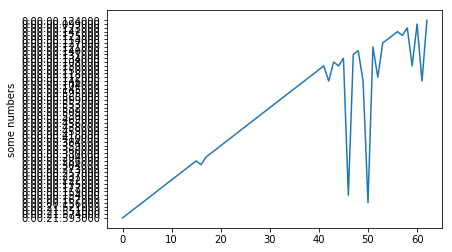

[datetime.timedelta(0, 21, 593000), datetime.timedelta(0, 21, 574000), datetime.timedelta(0, 21, 551000), datetime.timedelta(0, 21, 521000), datetime.timedelta(0, 0, 156000), datetime.timedelta(0, 0, 167000), datetime.timedelta(0, 0, 154000), datetime.timedelta(0, 0, 159000), datetime.timedelta(0, 0, 177000), datetime.timedelta(0, 0, 175000), datetime.timedelta(0, 0, 222000), datetime.timedelta(0, 0, 237000), datetime.timedelta(0, 0, 257000), datetime.timedelta(0, 0, 273000), datetime.timedelta(0, 0, 304000), datetime.timedelta(0, 0, 286000), datetime.timedelta(0, 0, 304000), datetime.timedelta(0, 0, 294000), datetime.timedelta(0, 0, 330000), datetime.timedelta(0, 0, 360000), datetime.timedelta(0, 0, 359000), datetime.timedelta(0, 0, 384000), datetime.timedelta(0, 0, 410000), datetime.timedelta(0, 0, 418000), datetime.timedelta(0, 0, 459000), datetime.timedelta(0, 0, 438000), datetime.timedelta(0, 0, 456000), datetime.timedelta(0, 0, 469000), datetime.timedelta(0, 0, 539000), datetime.

In [51]:
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()
print(propogation_times)

1.2. One Transactions per 10 second

In [6]:
for i in range(7):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(10)
    
for i in range(8):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(10)
    
for i in range(7):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(10)
    
for i in range(8):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(10)

2019-04-21 20:34:39.120 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:34:49.813 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:35:00.595 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:35:11.242 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:35:21.895 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:35:32.534 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful

2019-04-21 20:37:30.249 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:37:40.777 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:37:51.349 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8003\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 20:38:01.969 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 20:38:12.548 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8005\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:38:23.084 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8006\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:38:33.635 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4000\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:38:44.147 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:38:54.670 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:39:05.175 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 20:39:15.688 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4004\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:39:26.234 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4005\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:39:36.744 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:39:47.284 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

In [7]:
# Get Docker logs
# Get Docker logs
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_5s/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_5s/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_5s/%s.log'%(pwd[0],container))


[sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for 

In [8]:
docker_cleanup()

0dbabb72db2e
eace4068f862
c10d5c34f5d6
ab3bb5c6aeaf
111cfee211e3
4b6c418539e9
919cba17da5d
305ce06a8afd
a8630a5cdfba
8203a409b2ee
7819d7acf94f
96bbbe71e3f9
13b13884b2f3
e911ebb2bdae
a6222cfd2b5b
d7726f7d8952
95650d80d835
116aedbdced9
Deleted Volumes:
experiment1_peer1.hospital.organ.com
experiment1_peer1.histocompatibility.organ.com
experiment1_peer0.opo.organ.com
experiment1_peer1.opo.organ.com
experiment1_peer0.gp.organ.com
524d0a000589da4efce67be210be9b8cd13166369af977d974a8c210b1e92e24
experiment1_orderer.organ.com
experiment1_peer0.hospital.organ.com
experiment1_peer0.histocompatibility.organ.com
experiment1_peer1.gp.organ.com

Total reclaimed space: 16.34MB
Deleted Networks:
experiment1_organ_chain_network

docker rmi -f dev-peer1.opo.organ.com-organcc-1.0-f7ab76561c21a418dff95bfcdf78a45d8518b5f2d2be784ba3c86fb909c544e7 dev-peer0.opo.organ.com-organcc-1.0-3c2835bd5a5e83879fa36d0ce15cceb12743fd1bbdab349bc7725cdd819233c1 dev-peer0.gp.organ.com-organcc-1.0-98700bef371b6133ea4b2c0083

In [11]:
for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])


In [12]:
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))
    
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))    
    
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)
    
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))

All containers with their log files are 
peer0.gp.organ.com:<type 'list'>
peer1.gp.organ.com:<type 'list'>
peer0.histocompatibility.organ.com:<type 'list'>
peer1.histocompatibility.organ.com:<type 'list'>
peer0.opo.organ.com:<type 'list'>
peer1.opo.organ.com:<type 'list'>
peer0.hospital.organ.com:<type 'list'>
peer1.hospital.organ.com:<type 'list'>
Recevied Line 35
1 block was received at 2019-04-21 20:31:50.274000+00:00 by peer peer0.gp.organ.com
2 block was received at 2019-04-21 20:31:50.419000+00:00 by peer peer0.gp.organ.com
3 block was received at 2019-04-21 20:31:50.518000+00:00 by peer peer0.gp.organ.com
4 block was received at 2019-04-21 20:31:50.594000+00:00 by peer peer0.gp.organ.com
5 block was received at 2019-04-21 20:32:10.754000+00:00 by peer peer0.gp.organ.com
6 block was received at 2019-04-21 20:34:41.128000+00:00 by peer peer0.gp.organ.com
7 block was received at 2019-04-21 20:34:51.822000+00:00 by peer peer0.gp.organ.com
8 block was received at 2019-04-21 20:35:02.

21 block was received at 2019-04-21 20:37:21.683000+00:00 by peer peer1.hospital.organ.com
22 block was received at 2019-04-21 20:37:32.264000+00:00 by peer peer1.hospital.organ.com
23 block was received at 2019-04-21 20:37:42.792000+00:00 by peer peer1.hospital.organ.com
24 block was received at 2019-04-21 20:37:53.367000+00:00 by peer peer1.hospital.organ.com
25 block was received at 2019-04-21 20:38:03.990000+00:00 by peer peer1.hospital.organ.com
26 block was received at 2019-04-21 20:38:14.574000+00:00 by peer peer1.hospital.organ.com
27 block was received at 2019-04-21 20:38:25.100000+00:00 by peer peer1.hospital.organ.com
28 block was received at 2019-04-21 20:38:35.652000+00:00 by peer peer1.hospital.organ.com
29 block was received at 2019-04-21 20:38:46.165000+00:00 by peer peer1.hospital.organ.com
30 block was received at 2019-04-21 20:38:56.686000+00:00 by peer peer1.hospital.organ.com
31 block was received at 2019-04-21 20:39:07.188000+00:00 by peer peer1.hospital.organ.com

28 block was Validated at 2019-04-21 20:38:35.656000+00:00 by peer peer1.opo.organ.com
29 block was Validated at 2019-04-21 20:38:46.171000+00:00 by peer peer1.opo.organ.com
30 block was Validated at 2019-04-21 20:38:56.692000+00:00 by peer peer1.opo.organ.com
31 block was Validated at 2019-04-21 20:39:07.195000+00:00 by peer peer1.opo.organ.com
32 block was Validated at 2019-04-21 20:39:17.708000+00:00 by peer peer1.opo.organ.com
33 block was Validated at 2019-04-21 20:39:28.260000+00:00 by peer peer1.opo.organ.com
34 block was Validated at 2019-04-21 20:39:38.773000+00:00 by peer peer1.opo.organ.com
35 block was Validated at 2019-04-21 20:39:49.306000+00:00 by peer peer1.opo.organ.com
Validated Line 35
1 block was Validated at 2019-04-21 20:31:49.135000+00:00 by peer peer0.hospital.organ.com
2 block was Validated at 2019-04-21 20:31:49.212000+00:00 by peer peer0.hospital.organ.com
3 block was Validated at 2019-04-21 20:31:49.338000+00:00 by peer peer0.hospital.organ.com
4 block was V

18 block was Committed at 2019-04-21 20:36:49.937000+00:00 by peer peer1.histocompatibility.organ.com
19 block was Committed at 2019-04-21 20:37:00.796000+00:00 by peer peer1.histocompatibility.organ.com
20 block was Committed at 2019-04-21 20:37:11.491000+00:00 by peer peer1.histocompatibility.organ.com
21 block was Committed at 2019-04-21 20:37:21.802000+00:00 by peer peer1.histocompatibility.organ.com
22 block was Committed at 2019-04-21 20:37:32.406000+00:00 by peer peer1.histocompatibility.organ.com
23 block was Committed at 2019-04-21 20:37:42.902000+00:00 by peer peer1.histocompatibility.organ.com
24 block was Committed at 2019-04-21 20:37:53.489000+00:00 by peer peer1.histocompatibility.organ.com
25 block was Committed at 2019-04-21 20:38:04.098000+00:00 by peer peer1.histocompatibility.organ.com
26 block was Committed at 2019-04-21 20:38:14.710000+00:00 by peer peer1.histocompatibility.organ.com
27 block was Committed at 2019-04-21 20:38:25.214000+00:00 by peer peer1.histocomp

Adding peer0.hospital.organ.com with rt 2019-04-21 20:31:49.106000+00:00, vt 2019-04-21 20:31:49.135000+00:00 and ct 2019-04-21 20:31:49.184000+00:00
rt 2019-04-21 20:31:49.184000+00:00; vt 2019-04-21 20:31:49.212000+00:00; ct 2019-04-21 20:31:49.287000+00:00
Adding peer0.hospital.organ.com with rt 2019-04-21 20:31:49.184000+00:00, vt 2019-04-21 20:31:49.212000+00:00 and ct 2019-04-21 20:31:49.287000+00:00
rt 2019-04-21 20:31:49.287000+00:00; vt 2019-04-21 20:31:49.338000+00:00; ct 2019-04-21 20:31:49.404000+00:00
Adding peer0.hospital.organ.com with rt 2019-04-21 20:31:49.287000+00:00, vt 2019-04-21 20:31:49.338000+00:00 and ct 2019-04-21 20:31:49.404000+00:00
rt 2019-04-21 20:31:49.405000+00:00; vt 2019-04-21 20:31:49.451000+00:00; ct 2019-04-21 20:31:49.515000+00:00
Adding peer0.hospital.organ.com with rt 2019-04-21 20:31:49.405000+00:00, vt 2019-04-21 20:31:49.451000+00:00 and ct 2019-04-21 20:31:49.515000+00:00
rt 2019-04-21 20:32:10.756000+00:00; vt 2019-04-21 20:32:10.758000+00:

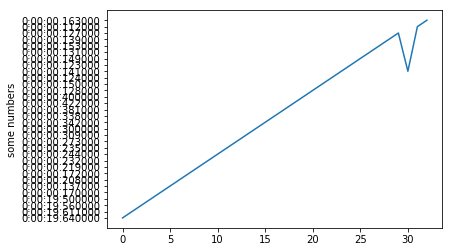

[datetime.timedelta(0, 19, 640000), datetime.timedelta(0, 19, 611000), datetime.timedelta(0, 19, 560000), datetime.timedelta(0, 19, 500000), datetime.timedelta(0, 0, 170000), datetime.timedelta(0, 0, 137000), datetime.timedelta(0, 0, 208000), datetime.timedelta(0, 0, 172000), datetime.timedelta(0, 0, 219000), datetime.timedelta(0, 0, 232000), datetime.timedelta(0, 0, 244000), datetime.timedelta(0, 0, 235000), datetime.timedelta(0, 0, 273000), datetime.timedelta(0, 0, 309000), datetime.timedelta(0, 0, 300000), datetime.timedelta(0, 0, 342000), datetime.timedelta(0, 0, 338000), datetime.timedelta(0, 0, 381000), datetime.timedelta(0, 0, 422000), datetime.timedelta(0, 0, 400000), datetime.timedelta(0, 0, 128000), datetime.timedelta(0, 0, 150000), datetime.timedelta(0, 0, 124000), datetime.timedelta(0, 0, 141000), datetime.timedelta(0, 0, 123000), datetime.timedelta(0, 0, 149000), datetime.timedelta(0, 0, 131000), datetime.timedelta(0, 0, 153000), datetime.timedelta(0, 0, 139000), datetime.

In [14]:
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()
# print(propogation_times)

# Experiment 1.2
With batch time-out of 5s

In [15]:
docker_cleanup()

"docker rm" requires at least 1 argument.
See 'docker rm --help'.

Usage:  docker rm [OPTIONS] CONTAINER [CONTAINER...]

Remove one or more containers
Total reclaimed space: 0B
docker rmi -f 
"docker rmi" requires at least 1 argument.
See 'docker rmi --help'.

Usage:  docker rmi [OPTIONS] IMAGE [IMAGE...]

Remove one or more images


2019-04-21 20:52:32.862 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:52:38.513 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:52:44.097 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:52:49.683 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:52:55.259 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 20:53:00.900 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful

2019-04-21 20:55:30.927 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:55:36.448 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:55:41.973 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8003\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 20:55:47.486 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 20:55:53.283 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8005\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

785582, \\\"consent_don_regis\\\": 84298638, \\\"vdrl_don\\\": \\\"xh\\\", \\\"lis2_initial_flush_ostxt\\\": \\\"trymbgcicoyoqwxjvybxspzmzysqlngvdunrkftsysejgnbfxm\\\", \\\"rt_ki_glomerul_count\\\": 91993510, \\\"diast_pa_cath_init_don\\\": 41088811, \\\"ins2_final_flush\\\": 80650651, \\\"num_lu_tx\\\": 24696236, \\\"hr_disposition\\\": 66475708, \\\"kir_discard_cd\\\": 19602921, \\\"other_inf_conf_don\\\": \\\"c\\\", \\\"don_date\\\": 77690265, \\\"pas2_back_tbl_flush\\\": 53281105, \\\"lv_eject_don\\\": 97959703, \\\"lipase_don (pa donors only)\\\": 76221364, \\\"pas2_final_flush\\\": 67742801, \\\"lis1_discard_cd\\\": 64972429, \\\"insulin_dep_don\\\": 96140564, \\\"lub_initial_flush_ostxt\\\": \\\"pxzkrpgryeyqnfsqyydfvqrngfaiapgbpdahryzbopytfufxfr\\\", \\\"lis2_disposition\\\": 60317853, \\\"kib_disposition\\\": 67615889, \\\"death_circum_don\\\": 45241583, \\\"hr_reason_cd\\\": 26728121, \\\"hr_discard_cd\\\": 1562302, \\\"kib_initial_flush_ostxt\\\": \\\"lhyejbjeurndgiwmxbjohcmz

2019-04-21 20:56:04.449 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8007\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 20:56:10.065 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8008\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 20:56:15.606 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8009\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:56:21.168 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8010\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:56:26.694 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8011\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 20:56:32.212 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8012\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 20:56:37.744 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8013\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 20:56:43.265 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8014\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 20:56:48.779 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4000\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:56:54.266 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:56:59.892 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:57:05.533 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 20:57:11.138 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4004\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:57:16.730 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4005\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:57:22.335 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:57:27.902 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 20:57:33.502 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4008\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:57:39.043 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4009\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:57:44.586 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4010\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 20:57:50.123 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4011\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

_initial_flush\\\": 74910400, \\\"da2\\\": 32136169, \\\"ins2_discard_cd_ostxt\\\": \\\"zcudncnzifqkfnpbvmyqoizelgitcqhbwezycscceauioyhzta\\\", \\\"consent_px_writ_doc\\\": \\\"o\\\", \\\"in_back_tbl_flush_ostxt\\\": \\\"navfposrknosqsxqgkdjotwosqshxqnbptuqyktqbrtbpcnspi\\\", \\\"contin_cocaine_don\\\": \\\"g\\\", \\\"age_don\\\": 17052542, \\\"bun_don\\\": 16124096, \\\"pas1_reason_cd\\\": 36117764, \\\"recovery_date_don\\\": 28797134, \\\"consent_don_regis\\\": 16880181, \\\"vdrl_don\\\": \\\"as\\\", \\\"lis2_initial_flush_ostxt\\\": \\\"funajcwqvefikasbrmrsrowqhbambvtemwzkxhxcfhyeyuuhod\\\", \\\"rt_ki_glomerul_count\\\": 33679775, \\\"diast_pa_cath_init_don\\\": 64139705, \\\"ins2_final_flush\\\": 64935333, \\\"num_lu_tx\\\": 14252110, \\\"hr_disposition\\\": 97912110, \\\"kir_discard_cd\\\": 33403354, \\\"other_inf_conf_don\\\": \\\"j\\\", \\\"don_date\\\": 19008927, \\\"pas2_back_tbl_flush\\\": 25424535, \\\"lv_eject_don\\\": 58987171, \\\"lipase_don (pa donors only)\\\": 76881662

2019-04-21 20:58:01.179 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4013\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 20:58:06.670 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4014\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

[sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for 

18 block was received at 2019-04-21 20:53:45.347000+00:00 by peer peer1.histocompatibility.organ.com
19 block was received at 2019-04-21 20:53:51.045000+00:00 by peer peer1.histocompatibility.organ.com
20 block was received at 2019-04-21 20:53:56.712000+00:00 by peer peer1.histocompatibility.organ.com
21 block was received at 2019-04-21 20:54:02.507000+00:00 by peer peer1.histocompatibility.organ.com
22 block was received at 2019-04-21 20:54:08.283000+00:00 by peer peer1.histocompatibility.organ.com
23 block was received at 2019-04-21 20:54:14.059000+00:00 by peer peer1.histocompatibility.organ.com
24 block was received at 2019-04-21 20:54:19.848000+00:00 by peer peer1.histocompatibility.organ.com
25 block was received at 2019-04-21 20:54:25.671000+00:00 by peer peer1.histocompatibility.organ.com
26 block was received at 2019-04-21 20:54:31.521000+00:00 by peer peer1.histocompatibility.organ.com
27 block was received at 2019-04-21 20:54:37.351000+00:00 by peer peer1.histocompatibility.

27 block was received at 2019-04-21 20:54:37.339000+00:00 by peer peer0.hospital.organ.com
28 block was received at 2019-04-21 20:54:43.180000+00:00 by peer peer0.hospital.organ.com
29 block was received at 2019-04-21 20:54:49.038000+00:00 by peer peer0.hospital.organ.com
30 block was received at 2019-04-21 20:54:54.923000+00:00 by peer peer0.hospital.organ.com
31 block was received at 2019-04-21 20:55:00.768000+00:00 by peer peer0.hospital.organ.com
32 block was received at 2019-04-21 20:55:06.619000+00:00 by peer peer0.hospital.organ.com
33 block was received at 2019-04-21 20:55:12.505000+00:00 by peer peer0.hospital.organ.com
34 block was received at 2019-04-21 20:55:18.644000+00:00 by peer peer0.hospital.organ.com
35 block was received at 2019-04-21 20:55:24.666000+00:00 by peer peer0.hospital.organ.com
36 block was received at 2019-04-21 20:55:30.408000+00:00 by peer peer0.hospital.organ.com
37 block was received at 2019-04-21 20:55:35.948000+00:00 by peer peer0.hospital.organ.com

60 block was Validated at 2019-04-21 20:57:44.062000+00:00 by peer peer1.gp.organ.com
61 block was Validated at 2019-04-21 20:57:49.609000+00:00 by peer peer1.gp.organ.com
62 block was Validated at 2019-04-21 20:57:55.141000+00:00 by peer peer1.gp.organ.com
63 block was Validated at 2019-04-21 20:58:00.653000+00:00 by peer peer1.gp.organ.com
64 block was Validated at 2019-04-21 20:58:06.192000+00:00 by peer peer1.gp.organ.com
65 block was Validated at 2019-04-21 20:58:11.686000+00:00 by peer peer1.gp.organ.com
Validated Line 65
1 block was Validated at 2019-04-21 20:49:38.939000+00:00 by peer peer0.histocompatibility.organ.com
2 block was Validated at 2019-04-21 20:49:39.032000+00:00 by peer peer0.histocompatibility.organ.com
3 block was Validated at 2019-04-21 20:49:39.126000+00:00 by peer peer0.histocompatibility.organ.com
4 block was Validated at 2019-04-21 20:49:39.210000+00:00 by peer peer0.histocompatibility.organ.com
5 block was Validated at 2019-04-21 20:50:07.024000+00:00 by p

7 block was Validated at 2019-04-21 20:52:43.544000+00:00 by peer peer1.opo.organ.com
8 block was Validated at 2019-04-21 20:52:49.119000+00:00 by peer peer1.opo.organ.com
9 block was Validated at 2019-04-21 20:52:54.700000+00:00 by peer peer1.opo.organ.com
10 block was Validated at 2019-04-21 20:53:00.294000+00:00 by peer peer1.opo.organ.com
11 block was Validated at 2019-04-21 20:53:05.928000+00:00 by peer peer1.opo.organ.com
12 block was Validated at 2019-04-21 20:53:11.554000+00:00 by peer peer1.opo.organ.com
13 block was Validated at 2019-04-21 20:53:17.200000+00:00 by peer peer1.opo.organ.com
14 block was Validated at 2019-04-21 20:53:22.830000+00:00 by peer peer1.opo.organ.com
15 block was Validated at 2019-04-21 20:53:28.453000+00:00 by peer peer1.opo.organ.com
16 block was Validated at 2019-04-21 20:53:34.098000+00:00 by peer peer1.opo.organ.com
17 block was Validated at 2019-04-21 20:53:39.722000+00:00 by peer peer1.opo.organ.com
18 block was Validated at 2019-04-21 20:53:45.

50 block was Committed at 2019-04-21 20:56:48.417000+00:00 by peer peer0.gp.organ.com
51 block was Committed at 2019-04-21 20:56:53.858000+00:00 by peer peer0.gp.organ.com
52 block was Committed at 2019-04-21 20:56:59.358000+00:00 by peer peer0.gp.organ.com
53 block was Committed at 2019-04-21 20:57:04.960000+00:00 by peer peer0.gp.organ.com
54 block was Committed at 2019-04-21 20:57:10.696000+00:00 by peer peer0.gp.organ.com
55 block was Committed at 2019-04-21 20:57:16.291000+00:00 by peer peer0.gp.organ.com
56 block was Committed at 2019-04-21 20:57:21.861000+00:00 by peer peer0.gp.organ.com
57 block was Committed at 2019-04-21 20:57:27.461000+00:00 by peer peer0.gp.organ.com
58 block was Committed at 2019-04-21 20:57:33.016000+00:00 by peer peer0.gp.organ.com
59 block was Committed at 2019-04-21 20:57:38.596000+00:00 by peer peer0.gp.organ.com
60 block was Committed at 2019-04-21 20:57:44.106000+00:00 by peer peer0.gp.organ.com
61 block was Committed at 2019-04-21 20:57:49.682000+0

4 block was Committed at 2019-04-21 20:49:39.613000+00:00 by peer peer0.opo.organ.com
5 block was Committed at 2019-04-21 20:50:07.166000+00:00 by peer peer0.opo.organ.com
6 block was Committed at 2019-04-21 20:52:37.911000+00:00 by peer peer0.opo.organ.com
7 block was Committed at 2019-04-21 20:52:43.649000+00:00 by peer peer0.opo.organ.com
8 block was Committed at 2019-04-21 20:52:49.278000+00:00 by peer peer0.opo.organ.com
9 block was Committed at 2019-04-21 20:52:54.921000+00:00 by peer peer0.opo.organ.com
10 block was Committed at 2019-04-21 20:53:00.502000+00:00 by peer peer0.opo.organ.com
11 block was Committed at 2019-04-21 20:53:06.074000+00:00 by peer peer0.opo.organ.com
12 block was Committed at 2019-04-21 20:53:11.753000+00:00 by peer peer0.opo.organ.com
13 block was Committed at 2019-04-21 20:53:17.440000+00:00 by peer peer0.opo.organ.com
14 block was Committed at 2019-04-21 20:53:23.045000+00:00 by peer peer0.opo.organ.com
15 block was Committed at 2019-04-21 20:53:28.590

24 block was Committed at 2019-04-21 20:54:20.152000+00:00 by peer peer1.hospital.organ.com
25 block was Committed at 2019-04-21 20:54:26.143000+00:00 by peer peer1.hospital.organ.com
26 block was Committed at 2019-04-21 20:54:31.901000+00:00 by peer peer1.hospital.organ.com
27 block was Committed at 2019-04-21 20:54:37.842000+00:00 by peer peer1.hospital.organ.com
28 block was Committed at 2019-04-21 20:54:43.687000+00:00 by peer peer1.hospital.organ.com
29 block was Committed at 2019-04-21 20:54:49.437000+00:00 by peer peer1.hospital.organ.com
30 block was Committed at 2019-04-21 20:54:55.446000+00:00 by peer peer1.hospital.organ.com
31 block was Committed at 2019-04-21 20:55:01.253000+00:00 by peer peer1.hospital.organ.com
32 block was Committed at 2019-04-21 20:55:07.227000+00:00 by peer peer1.hospital.organ.com
33 block was Committed at 2019-04-21 20:55:13.253000+00:00 by peer peer1.hospital.organ.com
34 block was Committed at 2019-04-21 20:55:19.119000+00:00 by peer peer1.hospita

Propogation Time of 34 is 0:00:00.671000
Propogation Time of 35 is 0:00:00.694000
Propogation Time of 36 is 0:00:00.117000
Propogation Time of 37 is 0:00:00.141000
Propogation Time of 38 is 0:00:00.099000
Propogation Time of 39 is 0:00:00.136000
Propogation Time of 40 is 0:00:00.148000
Propogation Time of 41 is 0:00:00.143000
Propogation Time of 42 is 0:00:00.166000
Propogation Time of 43 is 0:00:00.121000
Propogation Time of 44 is 0:00:00.134000
Propogation Time of 45 is 0:00:00.163000
Propogation Time of 46 is 0:00:00.160000
Propogation Time of 47 is 0:00:00.104000
Propogation Time of 48 is 0:00:00.133000
Propogation Time of 49 is 0:00:00.118000
Propogation Time of 50 is 0:00:00.161000
Propogation Time of 51 is 0:00:00.142000
Propogation Time of 52 is 0:00:00.108000
Propogation Time of 53 is 0:00:00.132000
Propogation Time of 54 is 0:00:00.156000
Propogation Time of 55 is 0:00:00.146000
Propogation Time of 56 is 0:00:00.146000
Propogation Time of 57 is 0:00:00.118000
Propogation Time

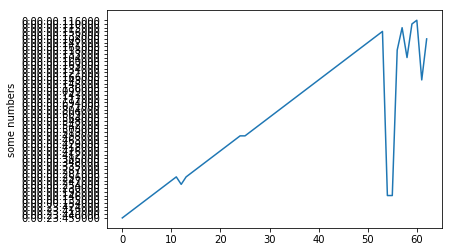

In [16]:
for i in range(15):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(5)
    
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_1_2_5s/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_1_2_5s/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_1_2_5s/%s.log'%(pwd[0],container))
docker_cleanup()
for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))
    
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))    
    
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)
    
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))
    
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()

Experiment 2.2 Batch time out of 5 sec and one transaction every 10 sec

2019-04-21 21:04:54.825 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:05.540 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:16.119 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:26.730 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:37.310 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-04-21 21:05:47.904 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful

2019-04-21 21:10:25.575 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 21:10:36.067 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 21:10:46.615 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8003\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 21:10:57.137 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 21:11:07.674 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8005\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 21:11:18.186 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8006\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 21:11:28.703 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8007\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 21:11:39.217 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8008\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 21:11:49.749 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8009\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 21:12:00.318 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8010\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 21:12:10.918 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8011\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-21 21:12:21.605 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8012\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-21 21:12:32.141 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8013\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-21 21:12:42.670 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8014\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-21 21:12:53.226 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4000\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:13:03.769 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:13:14.285 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 21:13:24.828 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 21:13:35.367 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4004\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:13:45.887 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4005\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:13:56.451 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 21:14:06.960 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 21:14:17.489 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4008\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:14:28.003 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4009\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:14:38.541 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4010\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-21 21:14:49.056 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4011\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-21 21:14:59.591 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4012\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:15:10.162 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4013\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-21 21:15:20.708 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4014\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

ycaajzdu\\\", \\\"blood_inf_don\\\": \\\"d\\\", \\\"lis1_disposition\\\": 24144200, \\\"kil_initial_flush\\\": 25154232, \\\"kib_reason_ostxt\\\": \\\"yxhavovaqzwixernssenlsmqptdodjpbhhobaucibnyypadpeo\\\", \\\"home_city_don\\\": \\\"siapuorblbhmuokqshox\\\", \\\"med_exam_report\\\": \\\"v\\\", \\\"chagas_history\\\": \\\"t\\\", \\\"kil_final_flush_ostxt\\\": \\\"rpnrdtualmhlpivpmkvyziktyuzyivxkslosrafxorxeozunfu\\\", \\\"ins1_disposition\\\": 69673105, \\\"hbv_sur_antigen_don\\\": \\\"zf\\\", \\\"pas2_initial_flush_ostxt\\\": \\\"yevkquktrbqwlblygottsxbjllswloxsjljlvbsmqsddatxftq\\\", \\\"kir_final_flush_ostxt\\\": \\\"cupnaxvpxwtxdnmvmecmrzsyqhxvkrlnmozmzrvszrqauzullb\\\", \\\"lub_final_flush\\\": 53390383, \\\"num_pa_tx\\\": 3233354, \\\"diast_pa_cath_post_don\\\": 31372654, \\\"med_exam_perm\\\": \\\"q\\\", \\\"hr_initial_flush\\\": 14212443, \\\"amylase_don\\\": 87366834, \\\"num_ki_recov\\\": 88809047, \\\"kil_back_tbl_flush\\\": 90348909, \\\"lur_initial_flush_ostxt\\\": \\\"ixv

Untagged: dev-peer0.histocompatibility.organ.com-organcc-1.0-3c5b27ae0eecc788492cf5c07381f1b7c2819d1dcacff92c5f06e8c045cc6672:latest
Deleted: sha256:abd2501d2a29530183dab75db4f5e36538065e220927001c378210dc81058189
Deleted: sha256:a63cf39f04ab5d50e0da44d8390a20438f7129d0297b2f19a554e177fe09ee51
Deleted: sha256:b5e5cfe41faa2756ba0166e017f1ce2b2394f66648049b7305dab28e5fd926d0
Deleted: sha256:e4c73b1755b25181d2b1d3b76eb4604cc7f5a6578819bd9236439b6c8ce2075b
Untagged: dev-peer1.histocompatibility.organ.com-organcc-1.0-0b5c9cd45a927b038f35508e3863fe8bca8b5206c5ab19556ea651bce6dd7a24:latest
Deleted: sha256:a102bd6b4aab34492869f92a562bc196df336b67aacc4bca4294557fe3eeed18
Deleted: sha256:76de659bec21fd5df5867431f0c5dc2a68dee67800b9bba801a717a9478c91a6
Deleted: sha256:43c1919c6a28e8fadf1c53e8cc618e8eb0f5e638a23b9a809abf5c2aca4872f2
Deleted: sha256:636e73eacb095be52b1589439037ae4d00ccdf62aa2e48d043b851efdfa5001a
Untagged: dev-peer1.gp.organ.com-organcc-1.0-618ffec708d17fefd8ca5ca18551372fee8c0f40d

12 block was received at 2019-04-21 21:06:03.556000+00:00 by peer peer1.histocompatibility.organ.com
13 block was received at 2019-04-21 21:06:14.148000+00:00 by peer peer1.histocompatibility.organ.com
14 block was received at 2019-04-21 21:06:24.790000+00:00 by peer peer1.histocompatibility.organ.com
15 block was received at 2019-04-21 21:06:35.410000+00:00 by peer peer1.histocompatibility.organ.com
16 block was received at 2019-04-21 21:06:46.013000+00:00 by peer peer1.histocompatibility.organ.com
17 block was received at 2019-04-21 21:06:56.630000+00:00 by peer peer1.histocompatibility.organ.com
18 block was received at 2019-04-21 21:07:07.237000+00:00 by peer peer1.histocompatibility.organ.com
19 block was received at 2019-04-21 21:07:17.870000+00:00 by peer peer1.histocompatibility.organ.com
20 block was received at 2019-04-21 21:07:28.540000+00:00 by peer peer1.histocompatibility.organ.com
21 block was received at 2019-04-21 21:07:39.271000+00:00 by peer peer1.histocompatibility.

40 block was received at 2019-04-21 21:11:02.147000+00:00 by peer peer0.hospital.organ.com
41 block was received at 2019-04-21 21:11:12.681000+00:00 by peer peer0.hospital.organ.com
42 block was received at 2019-04-21 21:11:23.192000+00:00 by peer peer0.hospital.organ.com
43 block was received at 2019-04-21 21:11:33.713000+00:00 by peer peer0.hospital.organ.com
44 block was received at 2019-04-21 21:11:44.224000+00:00 by peer peer0.hospital.organ.com
45 block was received at 2019-04-21 21:11:54.755000+00:00 by peer peer0.hospital.organ.com
46 block was received at 2019-04-21 21:12:05.328000+00:00 by peer peer0.hospital.organ.com
47 block was received at 2019-04-21 21:12:15.926000+00:00 by peer peer0.hospital.organ.com
48 block was received at 2019-04-21 21:12:26.615000+00:00 by peer peer0.hospital.organ.com
49 block was received at 2019-04-21 21:12:37.150000+00:00 by peer peer0.hospital.organ.com
50 block was received at 2019-04-21 21:12:47.678000+00:00 by peer peer0.hospital.organ.com

59 block was Validated at 2019-04-21 21:14:22.506000+00:00 by peer peer1.gp.organ.com
60 block was Validated at 2019-04-21 21:14:33.023000+00:00 by peer peer1.gp.organ.com
61 block was Validated at 2019-04-21 21:14:43.561000+00:00 by peer peer1.gp.organ.com
62 block was Validated at 2019-04-21 21:14:54.075000+00:00 by peer peer1.gp.organ.com
63 block was Validated at 2019-04-21 21:15:04.608000+00:00 by peer peer1.gp.organ.com
64 block was Validated at 2019-04-21 21:15:15.176000+00:00 by peer peer1.gp.organ.com
65 block was Validated at 2019-04-21 21:15:25.732000+00:00 by peer peer1.gp.organ.com
Validated Line 65
1 block was Validated at 2019-04-21 21:01:50.864000+00:00 by peer peer0.histocompatibility.organ.com
2 block was Validated at 2019-04-21 21:01:50.956000+00:00 by peer peer0.histocompatibility.organ.com
3 block was Validated at 2019-04-21 21:01:51.021000+00:00 by peer peer0.histocompatibility.organ.com
4 block was Validated at 2019-04-21 21:01:51.106000+00:00 by peer peer0.histo

17 block was Validated at 2019-04-21 21:06:56.643000+00:00 by peer peer1.opo.organ.com
18 block was Validated at 2019-04-21 21:07:07.240000+00:00 by peer peer1.opo.organ.com
19 block was Validated at 2019-04-21 21:07:17.875000+00:00 by peer peer1.opo.organ.com
20 block was Validated at 2019-04-21 21:07:28.542000+00:00 by peer peer1.opo.organ.com
21 block was Validated at 2019-04-21 21:07:39.291000+00:00 by peer peer1.opo.organ.com
22 block was Validated at 2019-04-21 21:07:49.991000+00:00 by peer peer1.opo.organ.com
23 block was Validated at 2019-04-21 21:08:00.791000+00:00 by peer peer1.opo.organ.com
24 block was Validated at 2019-04-21 21:08:11.455000+00:00 by peer peer1.opo.organ.com
25 block was Validated at 2019-04-21 21:08:22.116000+00:00 by peer peer1.opo.organ.com
26 block was Validated at 2019-04-21 21:08:32.826000+00:00 by peer peer1.opo.organ.com
27 block was Validated at 2019-04-21 21:08:43.524000+00:00 by peer peer1.opo.organ.com
28 block was Validated at 2019-04-21 21:08:

34 block was Committed at 2019-04-21 21:09:59.121000+00:00 by peer peer0.gp.organ.com
35 block was Committed at 2019-04-21 21:10:10.032000+00:00 by peer peer0.gp.organ.com
36 block was Committed at 2019-04-21 21:10:20.207000+00:00 by peer peer0.gp.organ.com
37 block was Committed at 2019-04-21 21:10:30.673000+00:00 by peer peer0.gp.organ.com
38 block was Committed at 2019-04-21 21:10:41.173000+00:00 by peer peer0.gp.organ.com
39 block was Committed at 2019-04-21 21:10:51.738000+00:00 by peer peer0.gp.organ.com
40 block was Committed at 2019-04-21 21:11:02.255000+00:00 by peer peer0.gp.organ.com
41 block was Committed at 2019-04-21 21:11:12.788000+00:00 by peer peer0.gp.organ.com
42 block was Committed at 2019-04-21 21:11:23.277000+00:00 by peer peer0.gp.organ.com
43 block was Committed at 2019-04-21 21:11:33.856000+00:00 by peer peer0.gp.organ.com
44 block was Committed at 2019-04-21 21:11:44.367000+00:00 by peer peer0.gp.organ.com
45 block was Committed at 2019-04-21 21:11:54.854000+0

45 block was Committed at 2019-04-21 21:11:54.881000+00:00 by peer peer1.histocompatibility.organ.com
46 block was Committed at 2019-04-21 21:12:05.435000+00:00 by peer peer1.histocompatibility.organ.com
47 block was Committed at 2019-04-21 21:12:16.042000+00:00 by peer peer1.histocompatibility.organ.com
48 block was Committed at 2019-04-21 21:12:26.757000+00:00 by peer peer1.histocompatibility.organ.com
49 block was Committed at 2019-04-21 21:12:37.279000+00:00 by peer peer1.histocompatibility.organ.com
50 block was Committed at 2019-04-21 21:12:47.785000+00:00 by peer peer1.histocompatibility.organ.com
51 block was Committed at 2019-04-21 21:12:58.367000+00:00 by peer peer1.histocompatibility.organ.com
52 block was Committed at 2019-04-21 21:13:08.889000+00:00 by peer peer1.histocompatibility.organ.com
53 block was Committed at 2019-04-21 21:13:19.401000+00:00 by peer peer1.histocompatibility.organ.com
54 block was Committed at 2019-04-21 21:13:29.998000+00:00 by peer peer1.histocomp

65 block was Committed at 2019-04-21 21:15:25.871000+00:00 by peer peer0.hospital.organ.com
Committed Line 66
0 block was Committed at 2019-04-21 21:01:44.583000+00:00 by peer peer1.hospital.organ.com
1 block was Committed at 2019-04-21 21:01:50.498000+00:00 by peer peer1.hospital.organ.com
2 block was Committed at 2019-04-21 21:01:50.576000+00:00 by peer peer1.hospital.organ.com
3 block was Committed at 2019-04-21 21:01:50.647000+00:00 by peer peer1.hospital.organ.com
4 block was Committed at 2019-04-21 21:01:50.740000+00:00 by peer peer1.hospital.organ.com
5 block was Committed at 2019-04-21 21:02:12.960000+00:00 by peer peer1.hospital.organ.com
6 block was Committed at 2019-04-21 21:05:00.082000+00:00 by peer peer1.hospital.organ.com
7 block was Committed at 2019-04-21 21:05:10.671000+00:00 by peer peer1.hospital.organ.com
8 block was Committed at 2019-04-21 21:05:21.300000+00:00 by peer peer1.hospital.organ.com
9 block was Committed at 2019-04-21 21:05:31.933000+00:00 by peer peer1

Adding peer1.gp.organ.com with rt 2019-04-21 21:02:07.931000+00:00, vt 2019-04-21 21:02:07.952000+00:00 and ct 2019-04-21 21:02:07.986000+00:00
rt 2019-04-21 21:02:12.839000+00:00; vt 2019-04-21 21:02:12.843000+00:00; ct 2019-04-21 21:02:12.977000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:02:12.839000+00:00, vt 2019-04-21 21:02:12.843000+00:00 and ct 2019-04-21 21:02:12.977000+00:00
rt 2019-04-21 21:04:59.846000+00:00; vt 2019-04-21 21:04:59.848000+00:00; ct 2019-04-21 21:05:00.083000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:04:59.846000+00:00, vt 2019-04-21 21:04:59.848000+00:00 and ct 2019-04-21 21:05:00.083000+00:00
rt 2019-04-21 21:05:10.558000+00:00; vt 2019-04-21 21:05:10.564000+00:00; ct 2019-04-21 21:05:10.702000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:05:10.558000+00:00, vt 2019-04-21 21:05:10.564000+00:00 and ct 2019-04-21 21:05:10.702000+00:00
rt 2019-04-21 21:05:21.161000+00:00; vt 2019-04-21 21:05:21.164000+00:00; ct 2019-04-21 21:05:

rt 2019-04-21 21:10:41.082000+00:00; vt 2019-04-21 21:10:41.084000+00:00; ct 2019-04-21 21:10:41.182000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:10:41.082000+00:00, vt 2019-04-21 21:10:41.084000+00:00 and ct 2019-04-21 21:10:41.182000+00:00
rt 2019-04-21 21:10:51.634000+00:00; vt 2019-04-21 21:10:51.637000+00:00; ct 2019-04-21 21:10:51.738000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:10:51.634000+00:00, vt 2019-04-21 21:10:51.637000+00:00 and ct 2019-04-21 21:10:51.738000+00:00
rt 2019-04-21 21:11:02.155000+00:00; vt 2019-04-21 21:11:02.160000+00:00; ct 2019-04-21 21:11:02.257000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:11:02.155000+00:00, vt 2019-04-21 21:11:02.160000+00:00 and ct 2019-04-21 21:11:02.257000+00:00
rt 2019-04-21 21:11:12.693000+00:00; vt 2019-04-21 21:11:12.695000+00:00; ct 2019-04-21 21:11:12.806000+00:00
Adding peer1.gp.organ.com with rt 2019-04-21 21:11:12.693000+00:00, vt 2019-04-21 21:11:12.695000+00:00 and ct 2019-04-21 21:11:

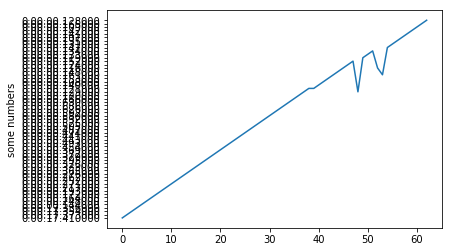

In [18]:
for i in range(15):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(10)
    
for i in range(15):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(10)
    
for i in range(15):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(10)
    
for i in range(15):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(10)
    
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_2_2_5s/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_2_2_5s/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_2_2_5s/%s.log'%(pwd[0],container))
docker_cleanup()
for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))
    
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))    
    
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)
    
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))
    
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()